https://colab.research.google.com/drive/1xThkyzW2M8yRqS1gELOVBowLZVfHlnwp#scrollTo=P5JgPw2Ka57y

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#resampled dated from 2000 jan to 2023 jan
FRED=pd.read_csv("",index_col='DATE',parse_dates=True)

In [ ]:
FRED.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277 entries, 2000-01-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  277 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [ ]:
FRED.head()

,IPG2211A2N
DATE,
2000-01-01,100.9655
2000-02-01,93.1095
2000-03-01,87.0262
2000-04-01,80.4459
2000-05-01,83.4576


## a. Resample the series and choose an essential graph to visualise the month wise five number summary.

In [ ]:
#Five number summary
FRED['IPG2211A2N'].describe()

count    277.000000
mean      99.327601
std        9.875407
min       80.445900
25%       90.825000
50%       99.195000
75%      106.898400
max      126.373300
Name: IPG2211A2N, dtype: float64

In [ ]:
FRED['year']=pd.DatetimeIndex(FRED.index).year
FRED['month']=pd.DatetimeIndex(FRED.index).month
FRED['day name']=pd.DatetimeIndex(FRED.index).day_name()
FRED

,IPG2211A2N,year,month,day name
DATE,,,,
2000-01-01,100.9655,2000,1,Saturday
2000-02-01,93.1095,2000,2,Tuesday
2000-03-01,87.0262,2000,3,Wednesday
2000-04-01,80.4459,2000,4,Saturday
2000-05-01,83.4576,2000,5,Monday
...,...,...,...,...
2022-09-01,100.8261,2022,9,Thursday
2022-10-01,91.1027,2022,10,Saturday
2022-11-01,100.1500,2022,11,Tuesday


In [ ]:
import seaborn as sns

Text(0, 0.5, 'Month wise five number summary')

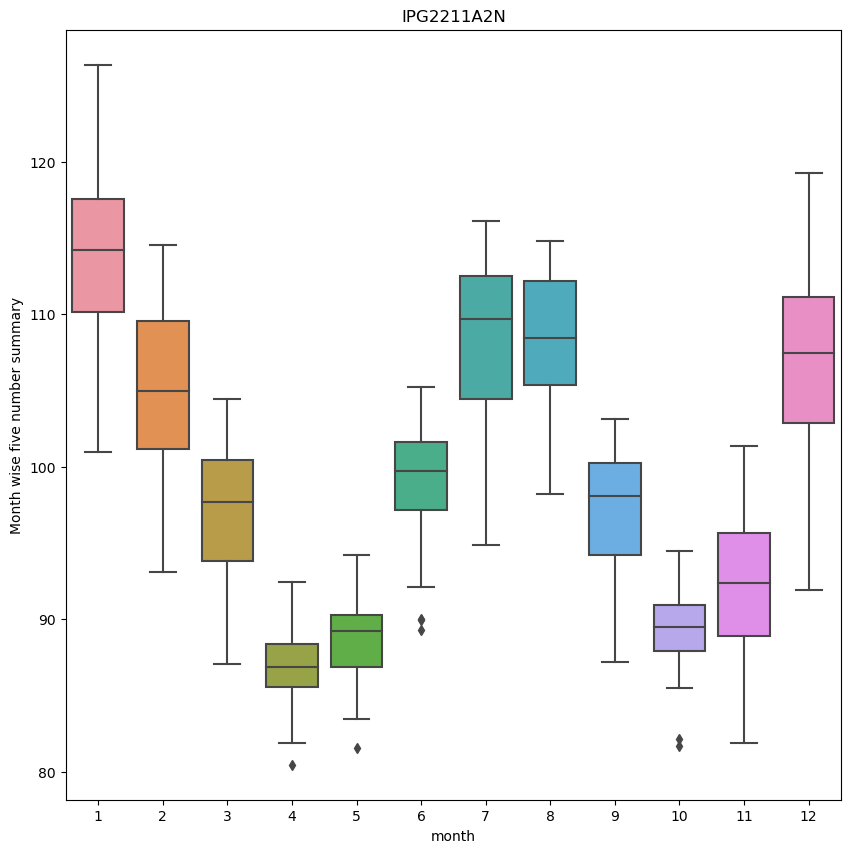

In [ ]:
fig, ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=FRED,x='month',y='IPG2211A2N',ax=ax)
ax.set_title('IPG2211A2N')
ax.set_ylabel('Month wise five number summary')

## b. Enumerate the components of a time series. Also, isolate the components of the data series considering the additive and multiplicative models.

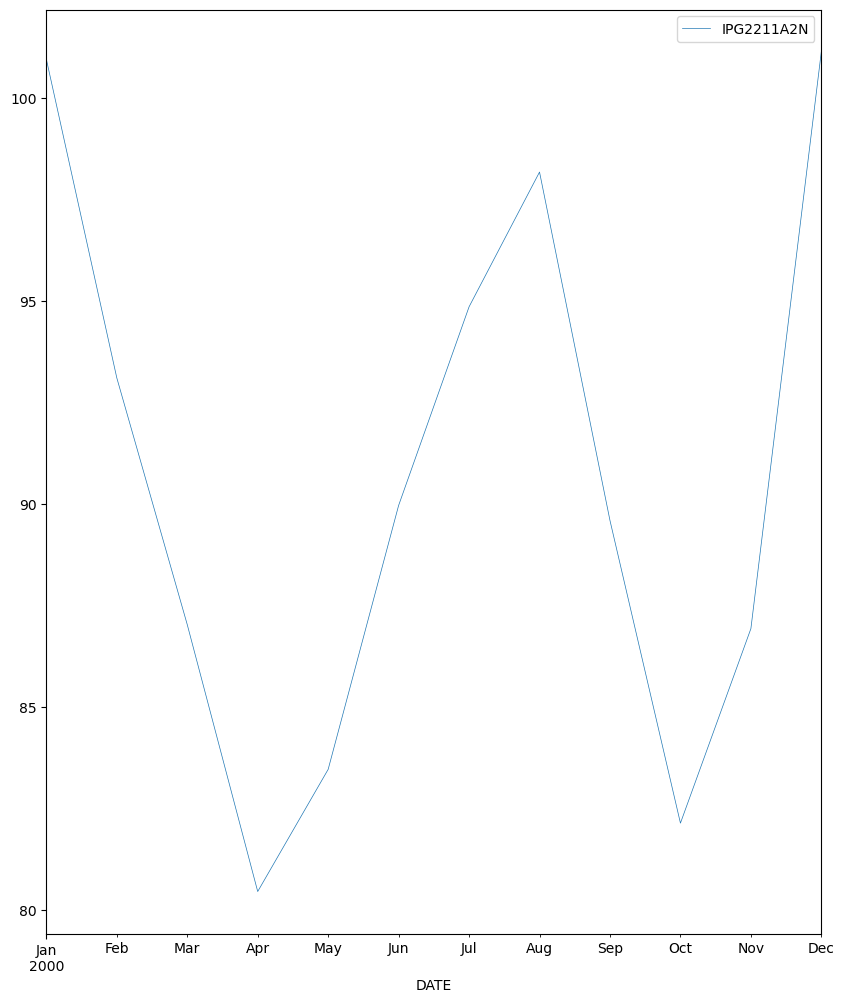

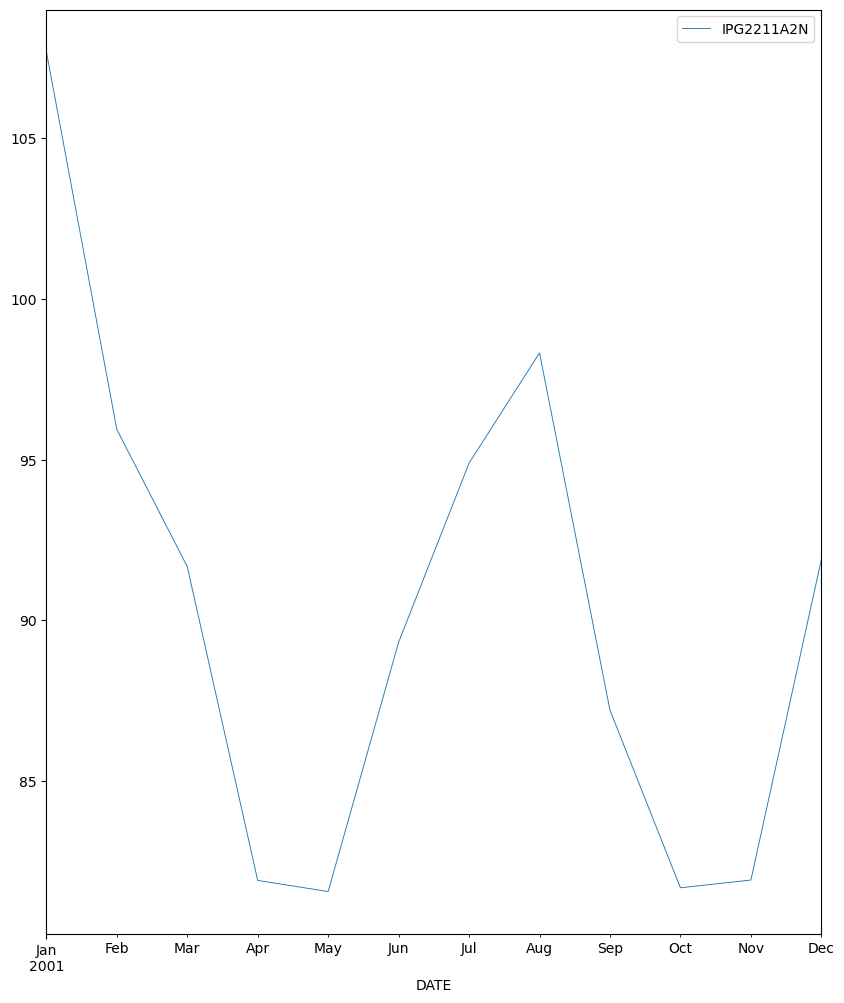

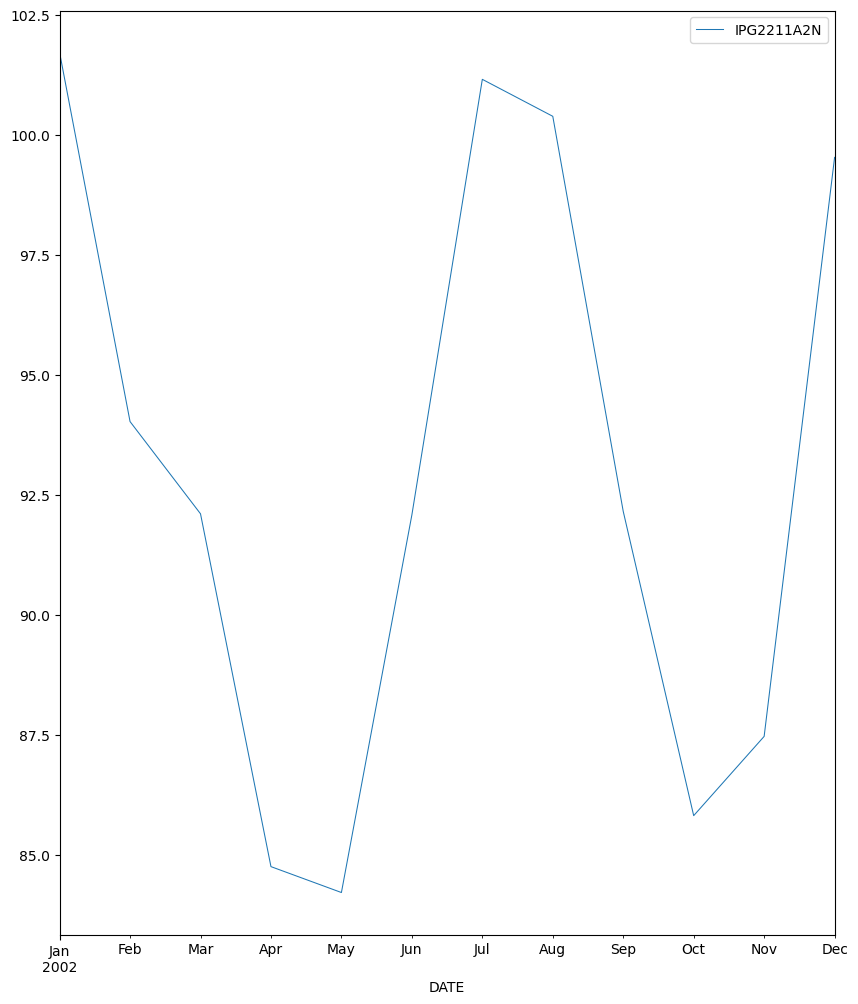

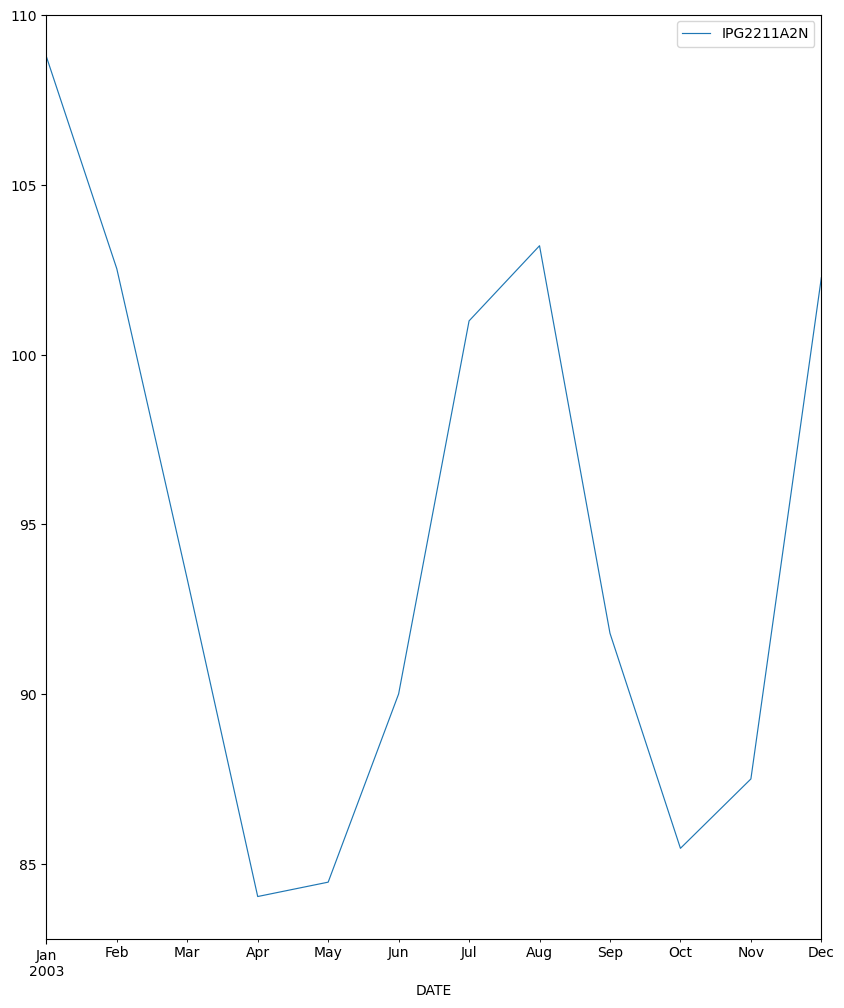

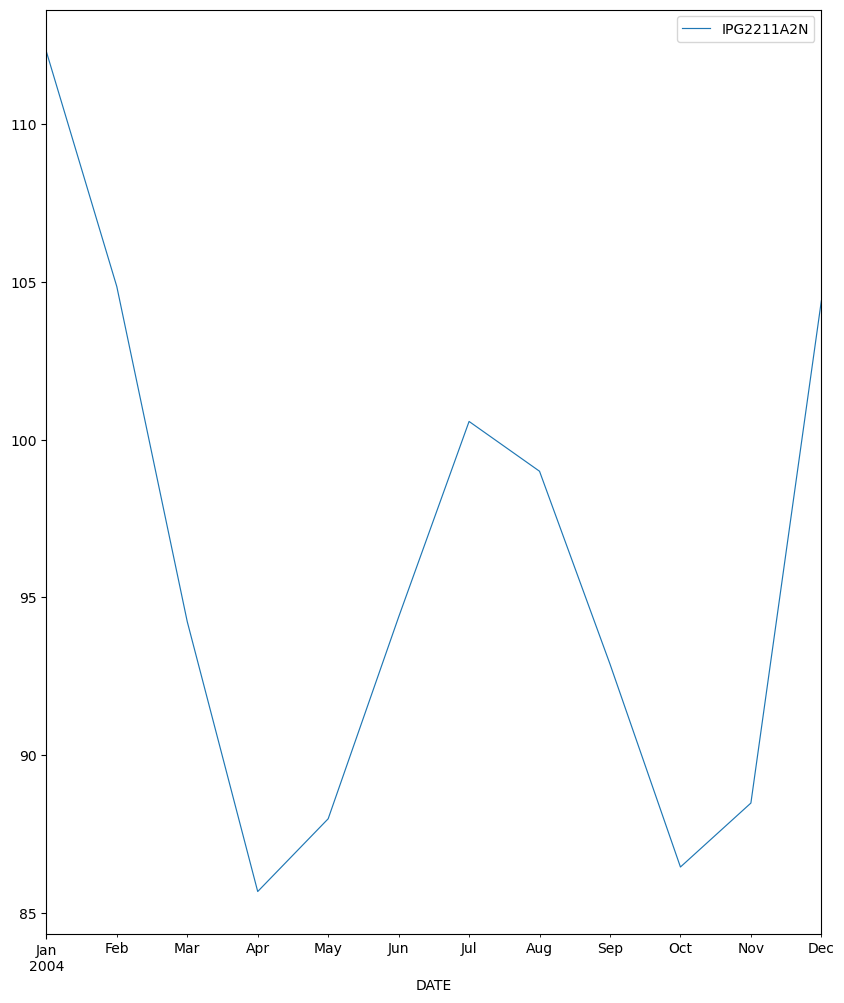

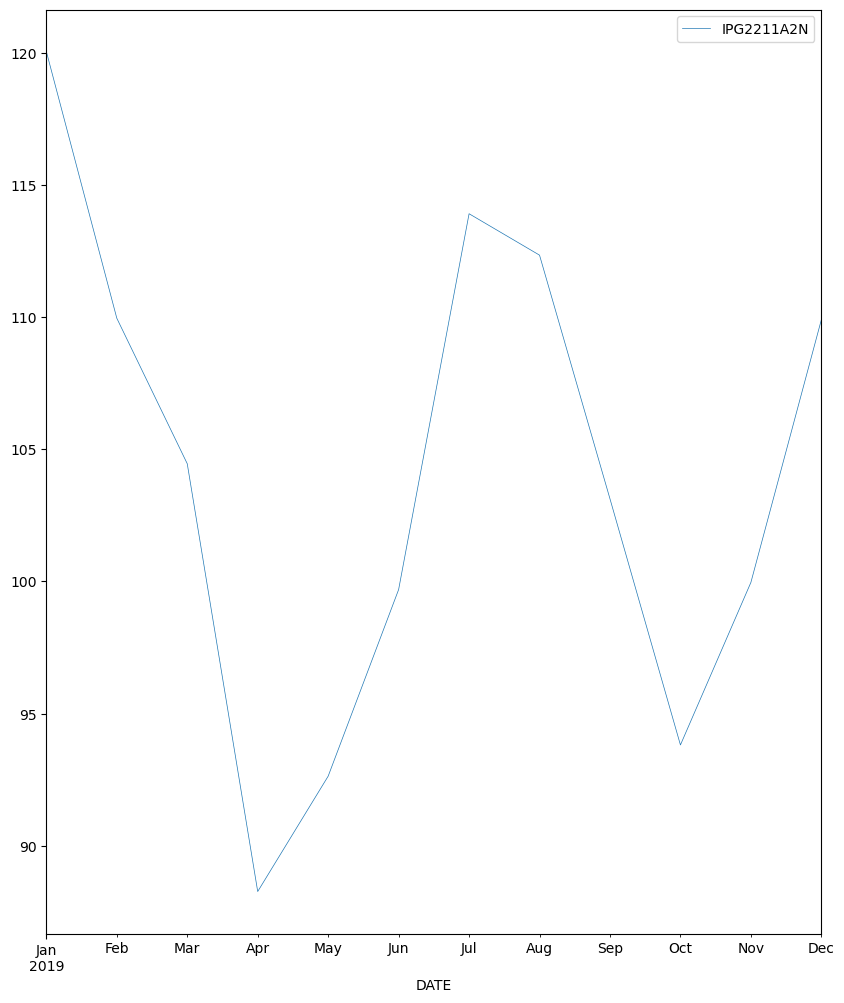

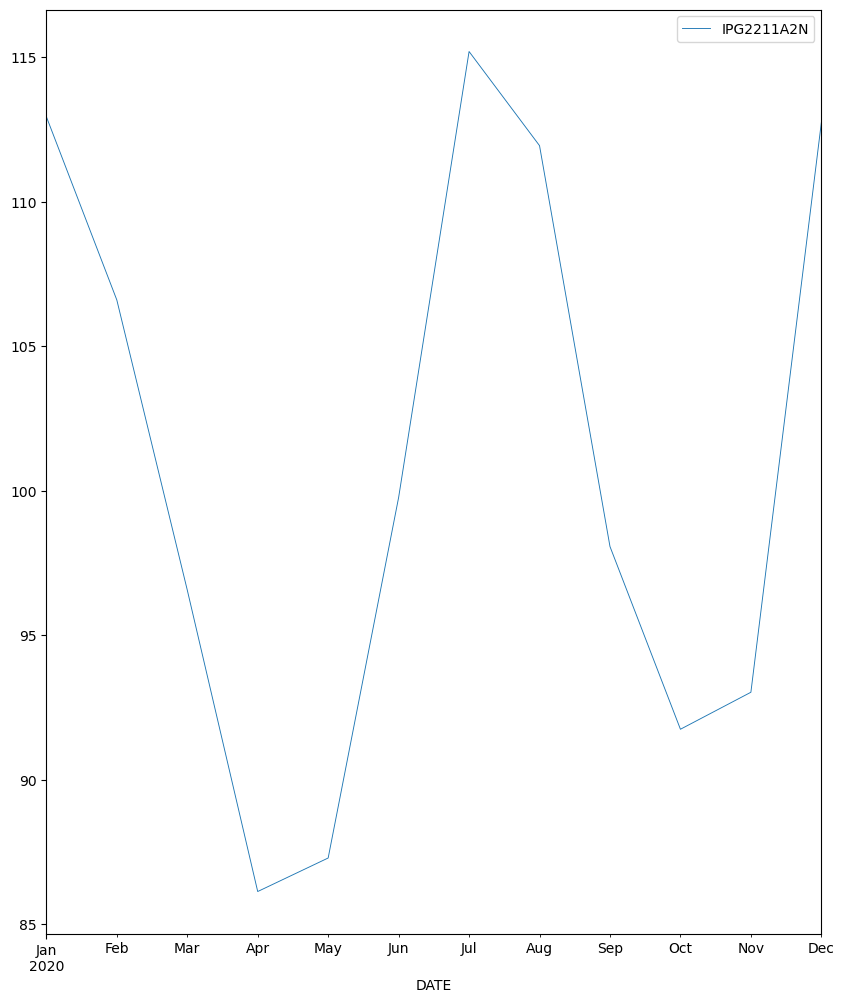

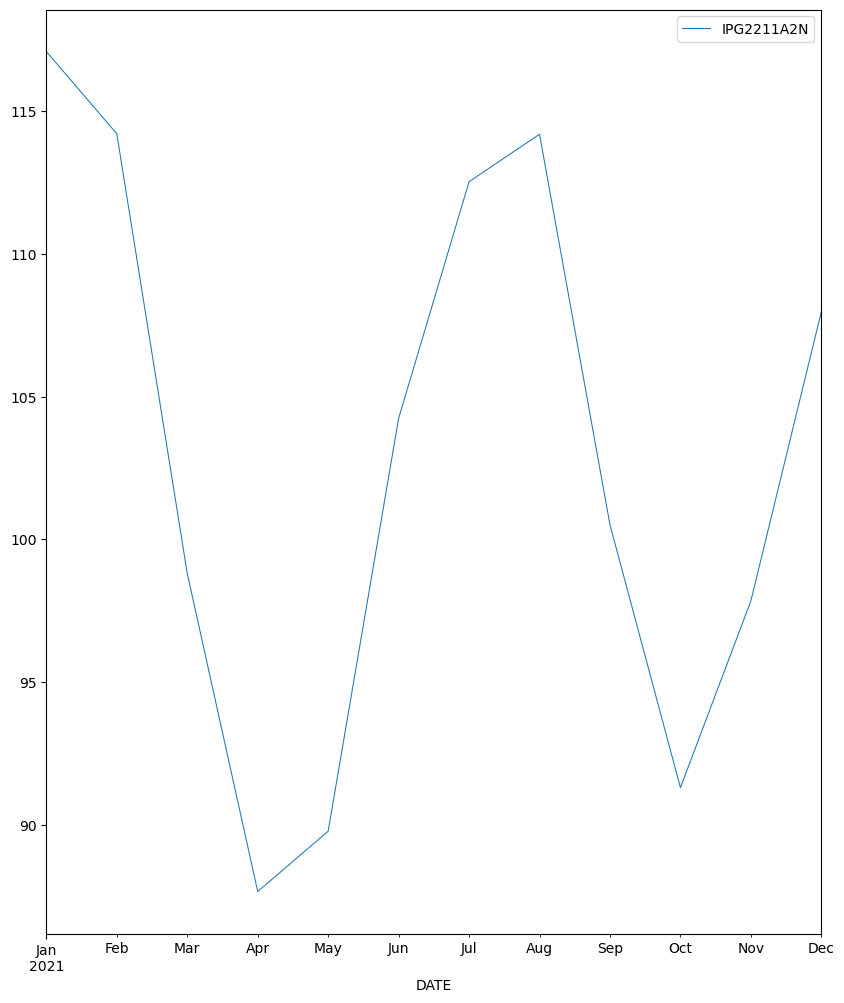

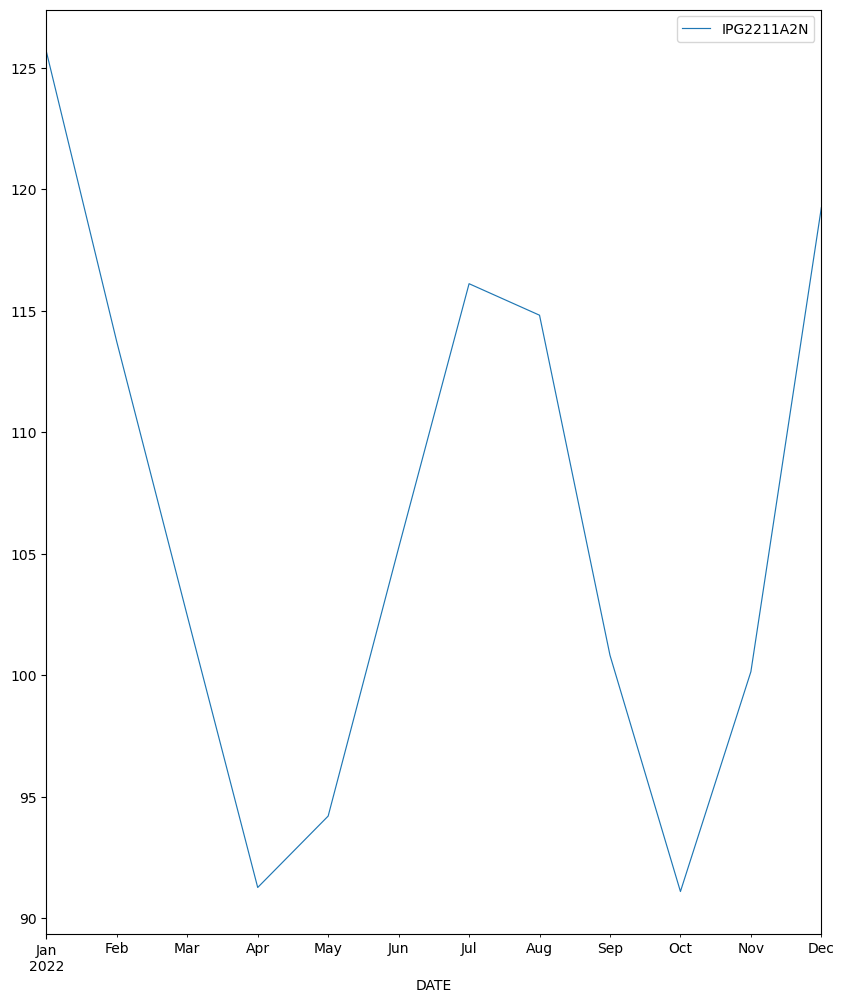

In [ ]:
#Visualizing the First and last 4 yrs of data to predict the trend
cols_plot=['IPG2211A2N']
FRED.loc['2000'][cols_plot].plot(linewidth=0.5);
FRED.loc['2001'][cols_plot].plot(linewidth=0.65);
FRED.loc['2002'][cols_plot].plot(linewidth=0.75);
FRED.loc['2003'][cols_plot].plot(linewidth=0.85);
FRED.loc['2004'][cols_plot].plot(linewidth=0.85);
FRED.loc['2019'][cols_plot].plot(linewidth=0.5);
FRED.loc['2020'][cols_plot].plot(linewidth=0.65);
FRED.loc['2021'][cols_plot].plot(linewidth=0.75);
FRED.loc['2022'][cols_plot].plot(linewidth=0.85);


In [ ]:
#define a function to-check trend and plot
def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df,
             marker='.',
             linestyle='-',
             linewidth=0.5,
             color='blue',
             label='Original')

    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o',
             markersize=8,
             linestyle='-',
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()


Slope 0.024484965034959012
NRMSE: 0.32815713219939985


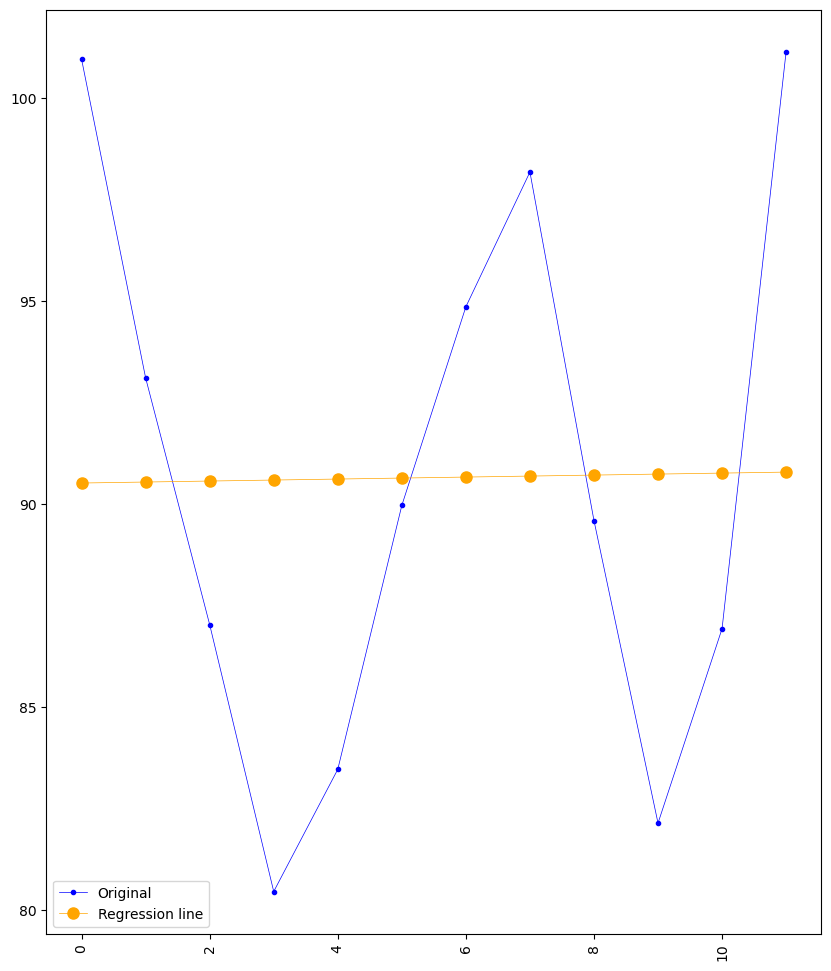

Slope -1.0069573426573448
NRMSE: 0.26636219920314064


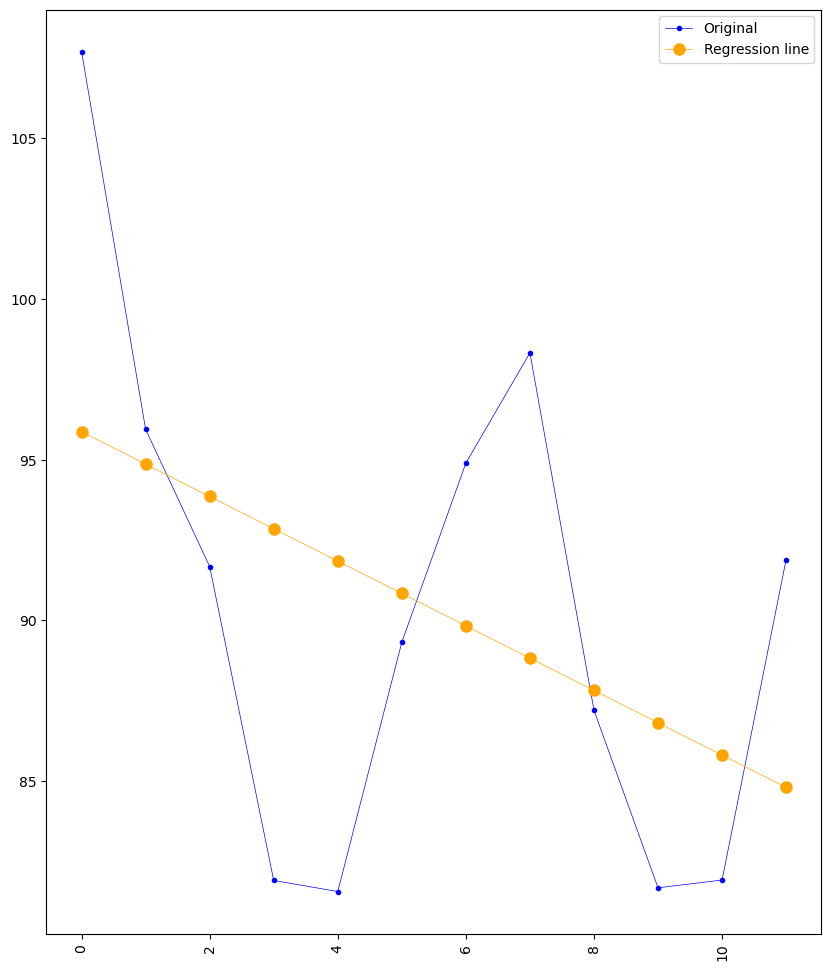

Slope -0.11353076923077399
NRMSE: 0.3570808758627635


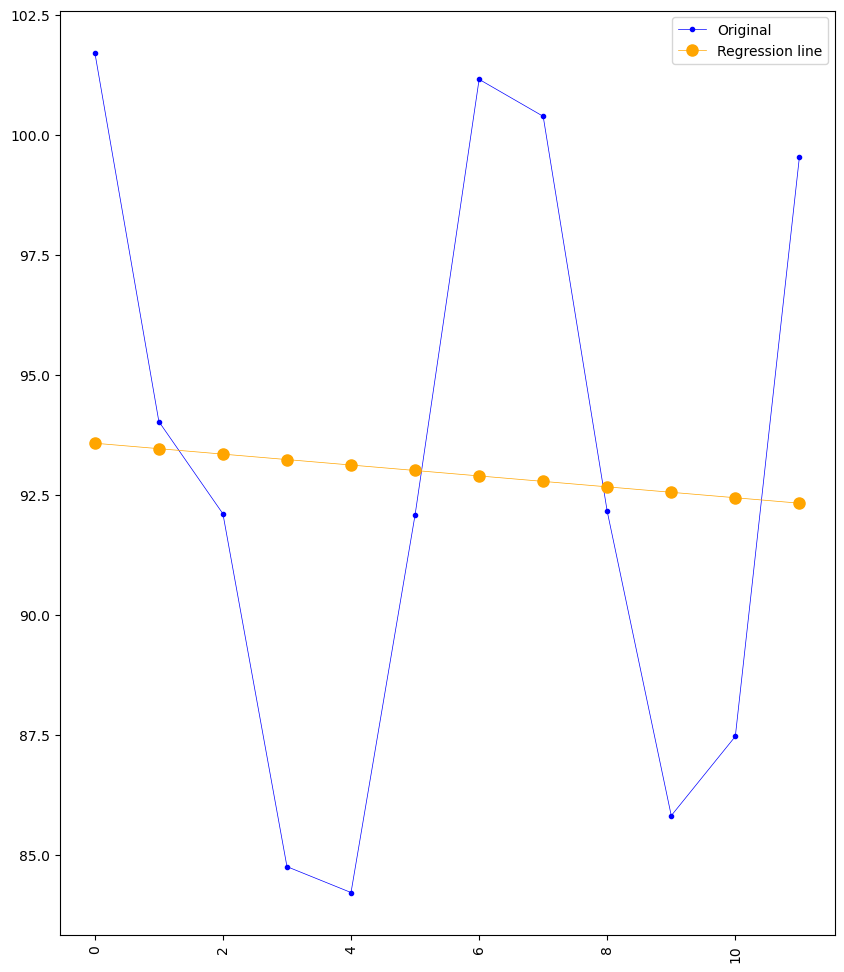

Slope -0.5468472027972087
NRMSE: 0.3245204616777444


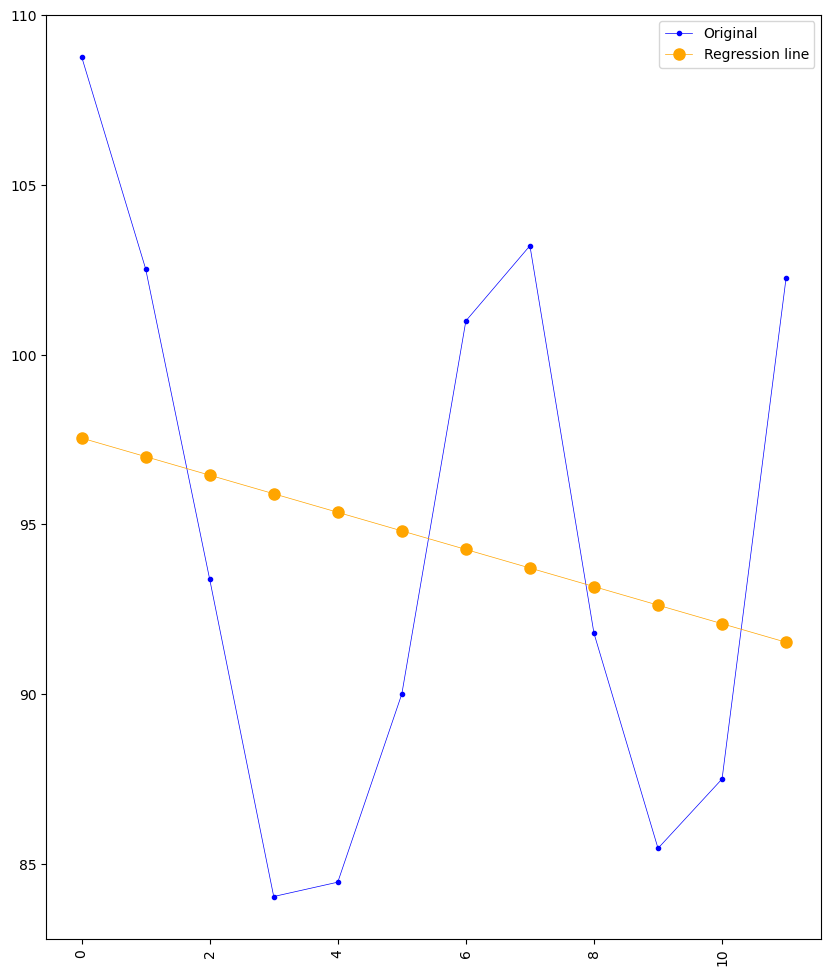

Slope -0.44935034965035336
NRMSE: 0.28482383262257455


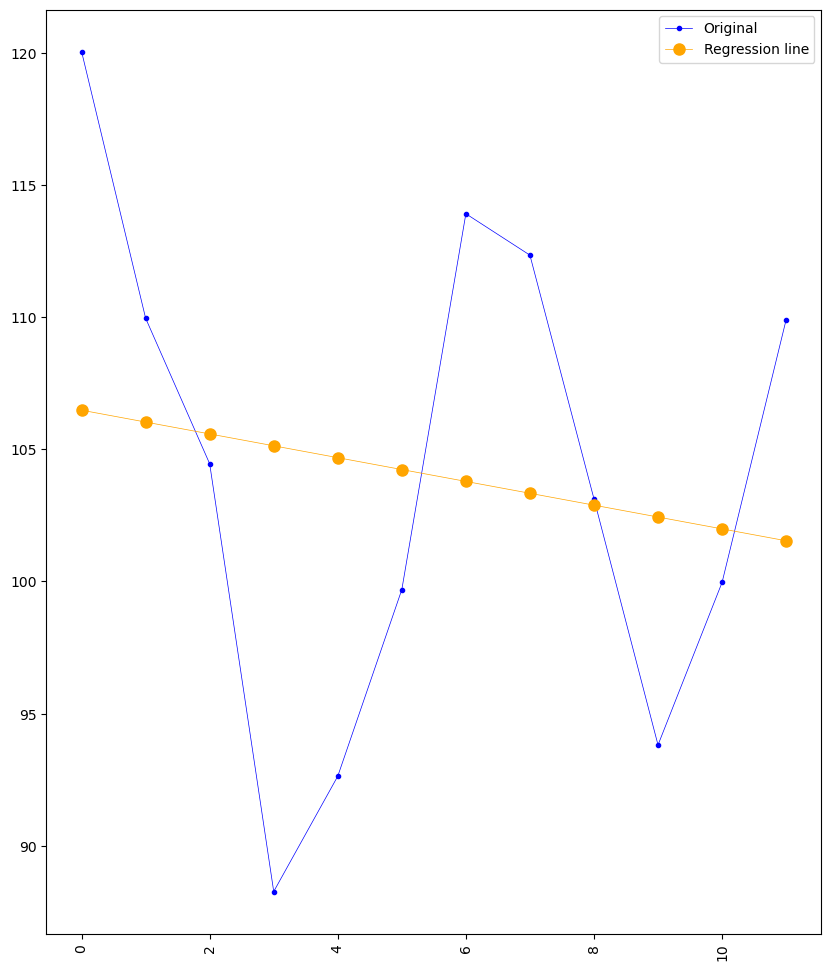

Slope -0.03195909090909315
NRMSE: 0.34702163590129087


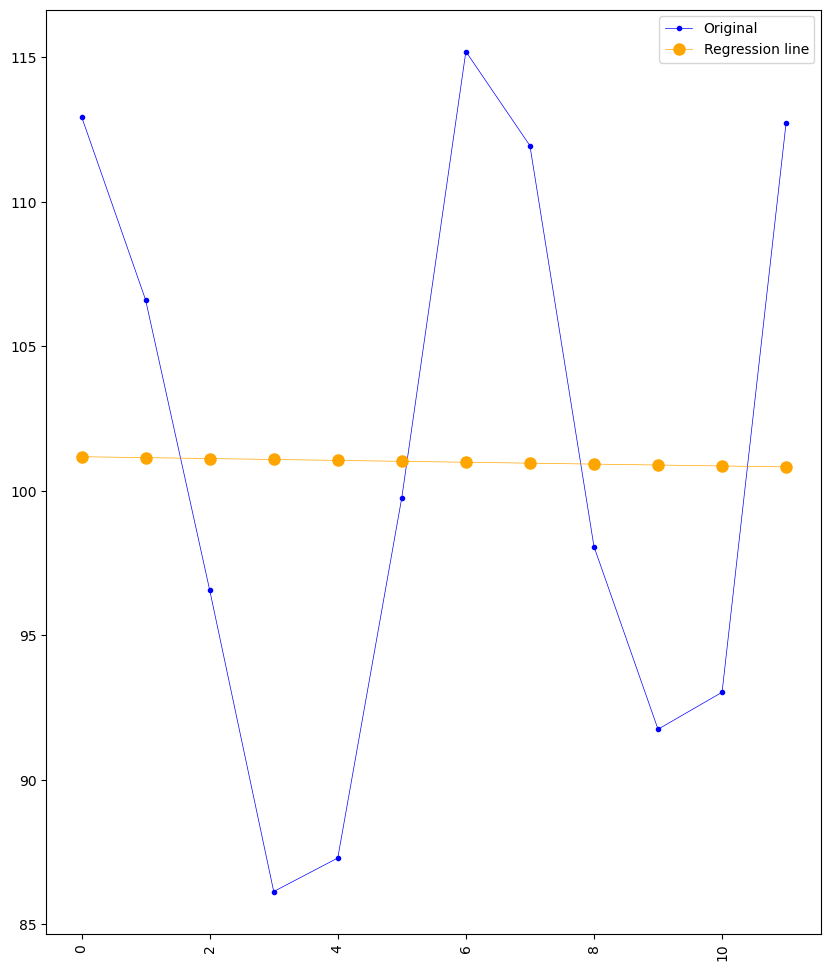

Slope -0.5395608391608441
NRMSE: 0.32862743334952704


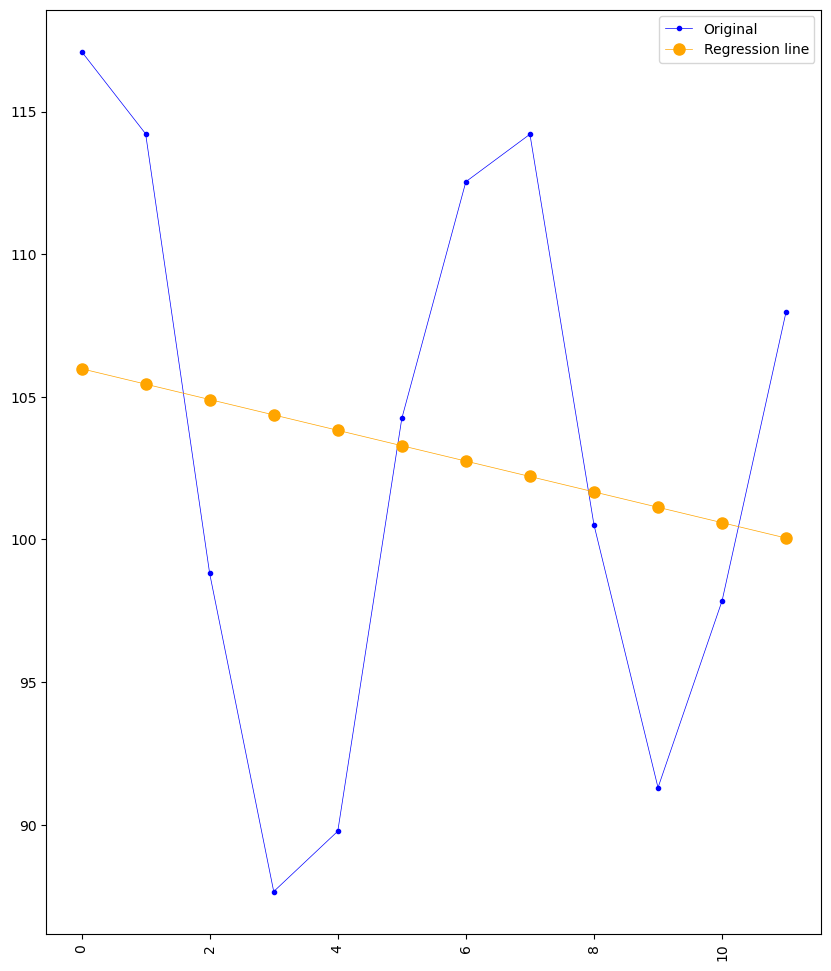

Slope -0.5306293706293767
NRMSE: 0.3139462349550851


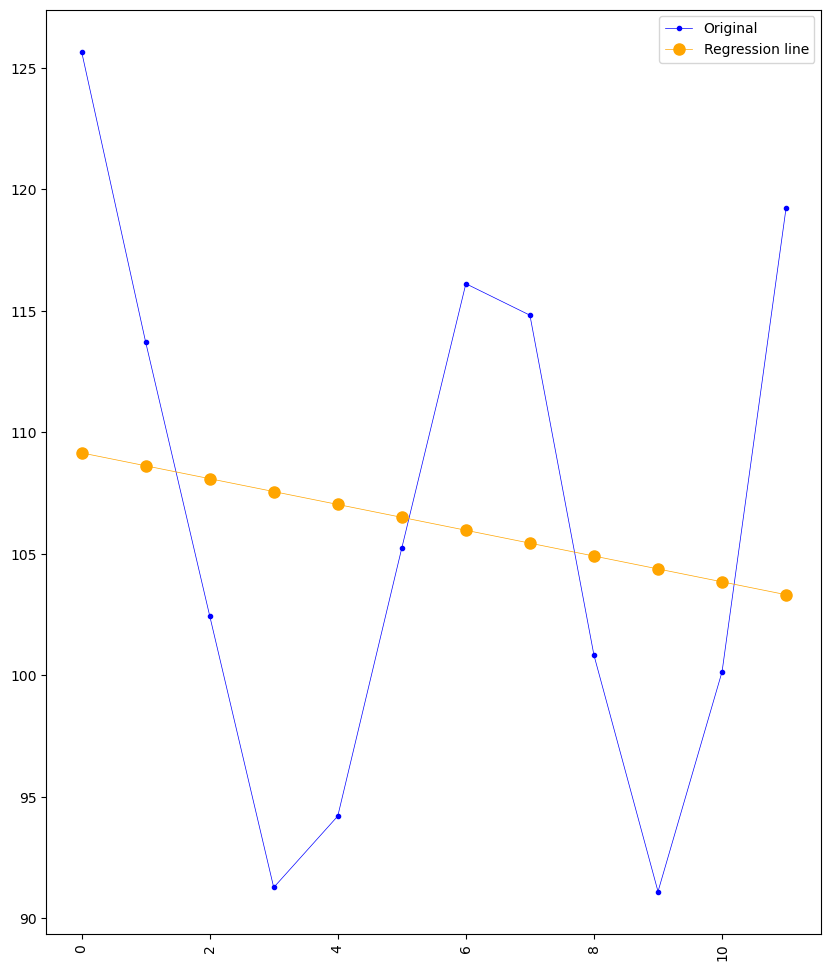

In [ ]:
# check for plot
detect_trend (FRED.loc['2000']['IPG2211A2N'].values)
detect_trend (FRED.loc['2001']['IPG2211A2N'].values)
detect_trend (FRED.loc['2002']['IPG2211A2N'].values)
detect_trend (FRED.loc['2003']['IPG2211A2N'].values)
detect_trend (FRED.loc['2019']['IPG2211A2N'].values)
detect_trend (FRED.loc['2020']['IPG2211A2N'].values)
detect_trend (FRED.loc['2021']['IPG2211A2N'].values)
detect_trend (FRED.loc['2022']['IPG2211A2N'].values)

## Observation
* There is clear trend visible by seeing the first and last 4 years taken into consideration as an sample from all other 22 years

* We can see that every year in April month the usage goes down and in most of the years its low till may and gets an drastic increase in the usage

* And also there is an low usage in the month of octobers and in most of the years its low till November(slight increase than OCT) and again gets increased in December

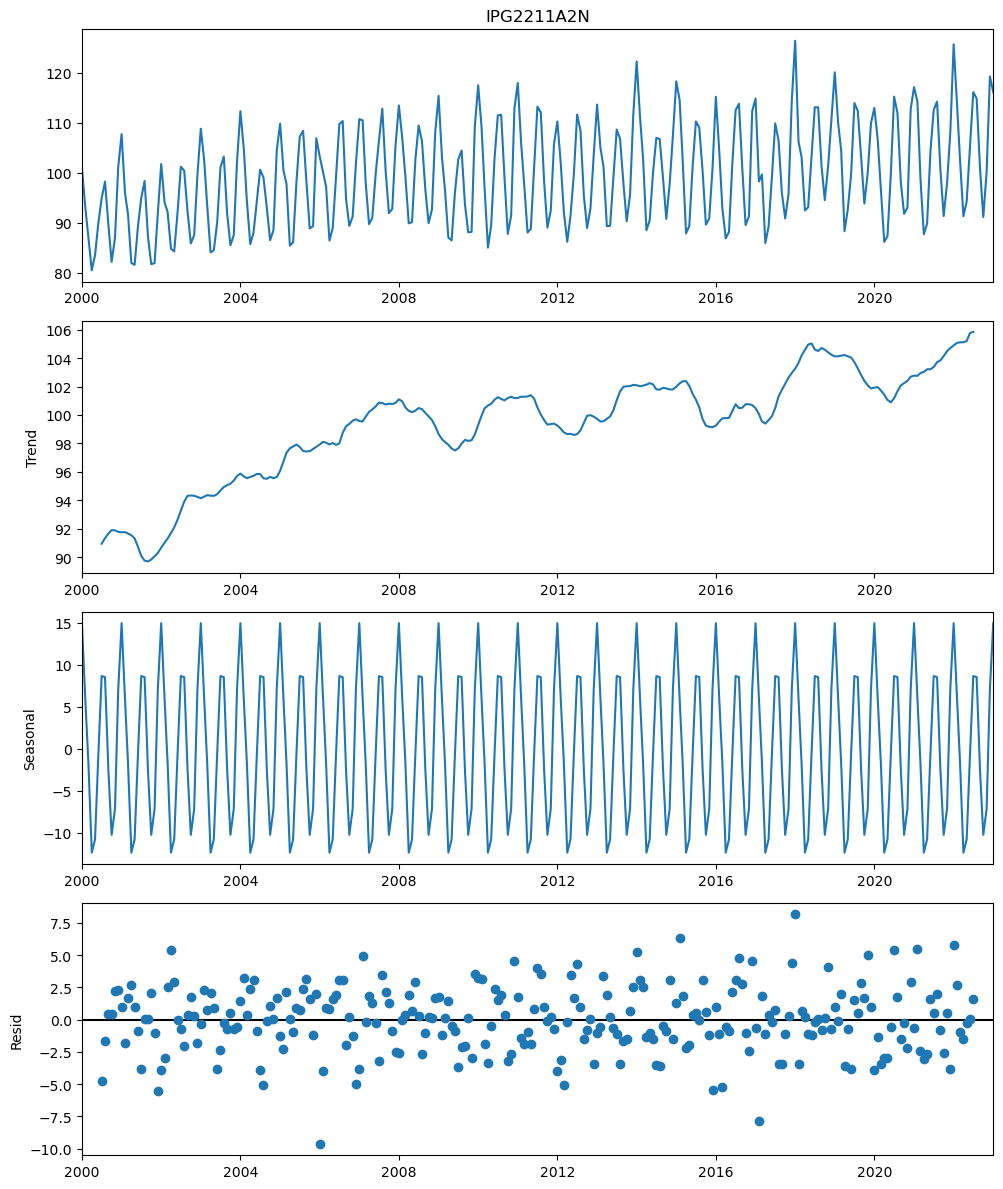

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
#additive Decomposition
rcParams['figure.figsize']=10,12

result_addictive = seasonal_decompose(FRED['IPG2211A2N'],model='additive')
fig = result_addictive.plot()

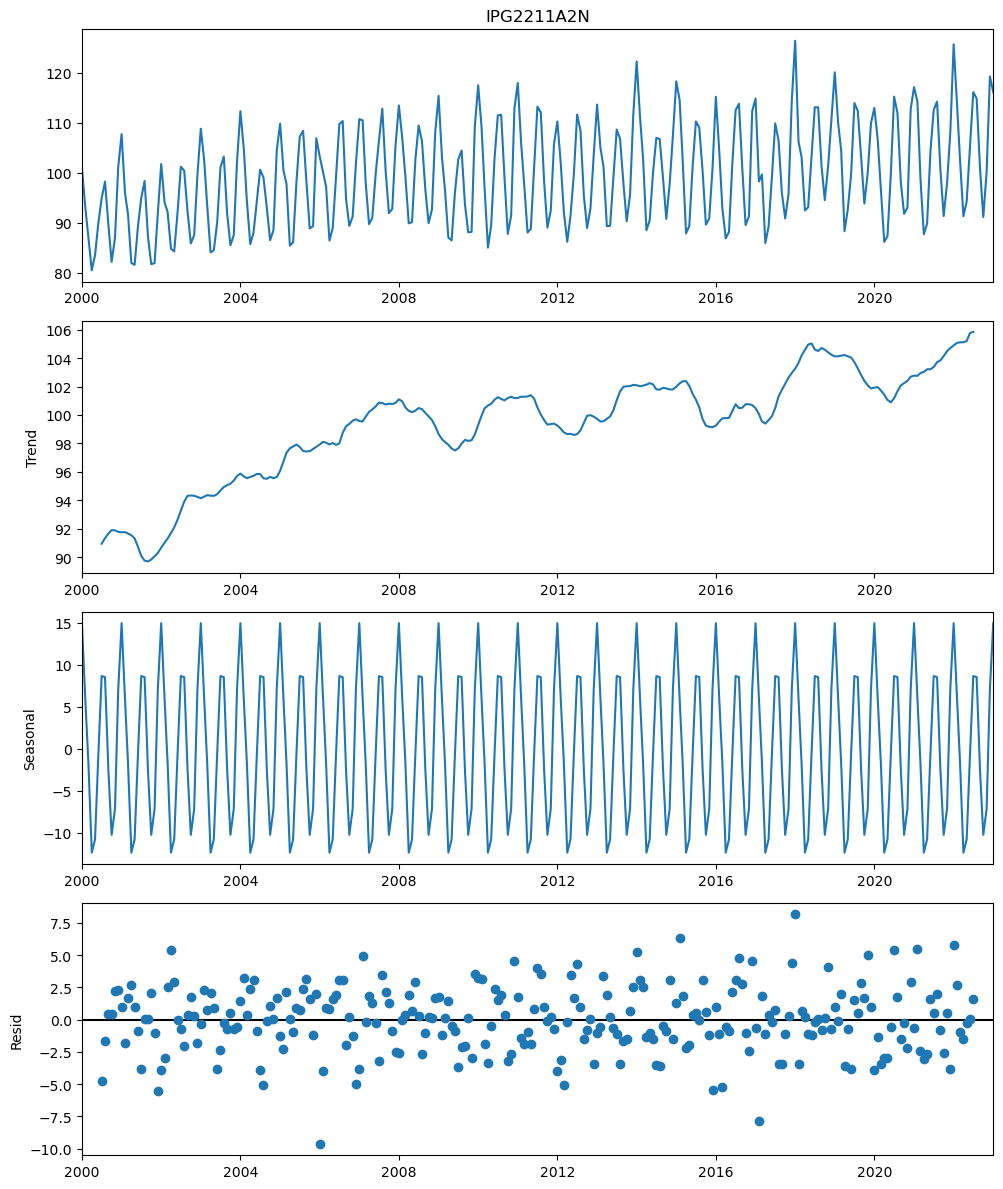

In [ ]:
#Multiplicative  Decomposition
rcParams['figure.figsize']=10,12

result_Multiplicative = seasonal_decompose(FRED['IPG2211A2N'],model='Multiplicative')
fig = result_Multiplicative.plot()

## 2. Is the dataset used in Q.1 is stationary? If yes, justify. Otherwise, make the time series stationary. Also, using illustrative plots comment on why ARIMA model requires a time series to be stationary for forecasting.

In [ ]:
X=FRED['IPG2211A2N'].values
split=len(X)/2
split=int(split)

X1,X2=X[0:split],X[split:]

mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()

print('mean1 ={:10.2f},mean2 ={:10.2f}'.format(mean1,mean2))
print('variance1 ={:10.2f},variance2 ={:10.2f}'.format(var1,var2))


mean1 =     96.52,mean2 =    102.11
variance1 =     82.13,variance2 =     96.53


# observation
* The time series is not a stationary as there is an difference between the mean and variance of each half in Time series

# Stationarity test: Method 3: Augmented Dickey Fuller-(ADF)test
* The intuition behind the test is that it determines how strongly a time series is define by a trend (i.e.no Stationarity

## Ho:time series is not stationary

## H1:time series is Stationary

*p value <=0.05 Reject the null hypothesis

*p value > 0.05 Accept the null hypothesis

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse



In [ ]:
X = FRED['IPG2211A2N'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 22 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))


For the CONSOLIDATED 22 years
ADF Statistic: -1.651705
p-value: 0.456151
Critical Values:
	   1%:   -3.455
	   5%:   -2.873
	  10%:   -2.573


# conclusion
* Consolidated years - p Values is less than 0.05 hence Ho can be rejected
* Ho: Time series is Not Stationary H1: Time series is stationary
* Means TS is stationery
* Yearly p-value method ; p-value is less than 0.05 so we reject the null hypothesis for yearly Time Series

In [ ]:
monthly_data = FRED.resample('M').mean()
ts=monthly_data["IPG2211A2N"]

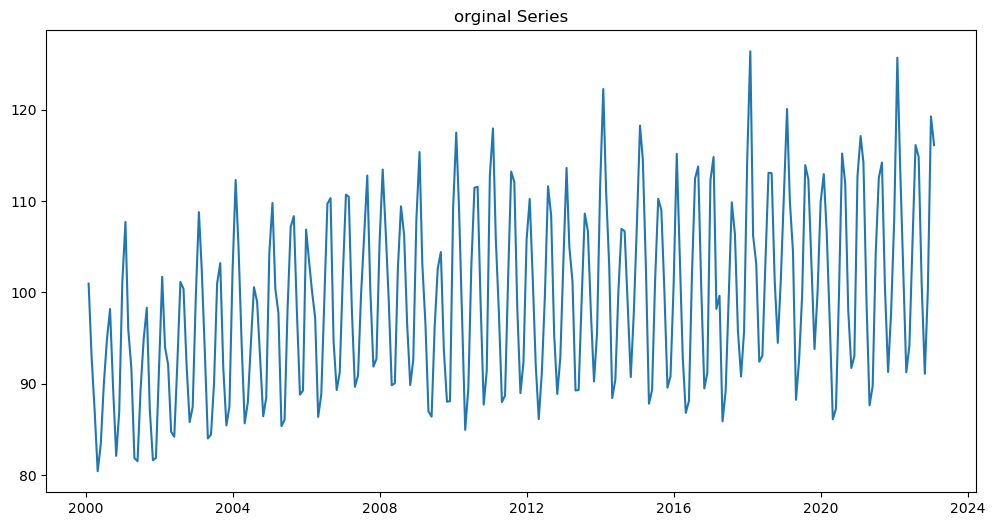

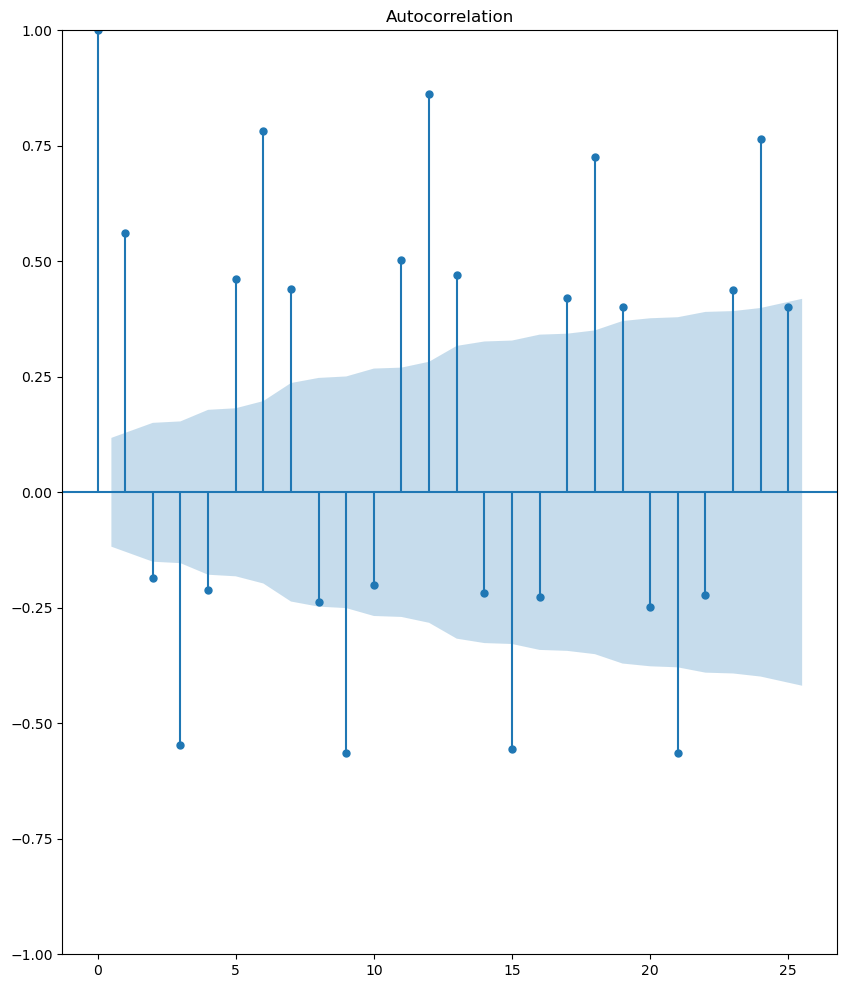

In [ ]:
#orginal Series
plt.figure(figsize=(12,6))

plt.plot(ts)
plt.title("orginal Series")
acf0=plot_acf(ts)

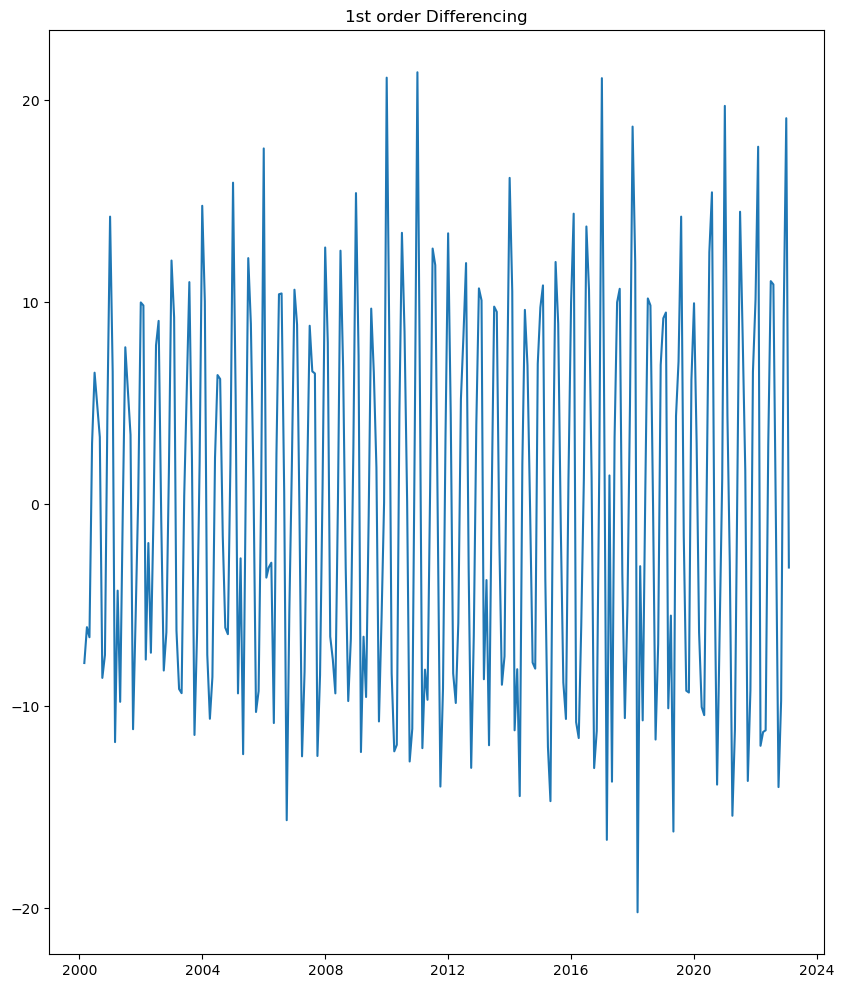

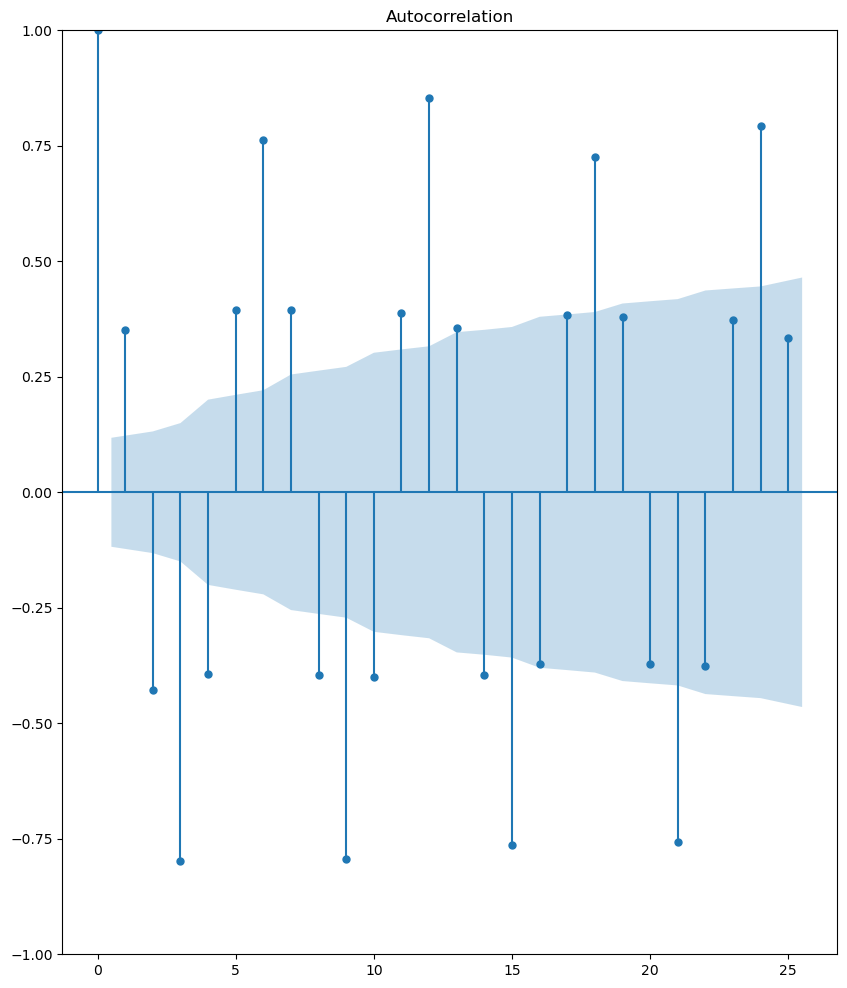

In [ ]:
plt.plot(ts.diff());
plt.title("1st order Differencing")
acf1=plot_acf(ts.diff().dropna())

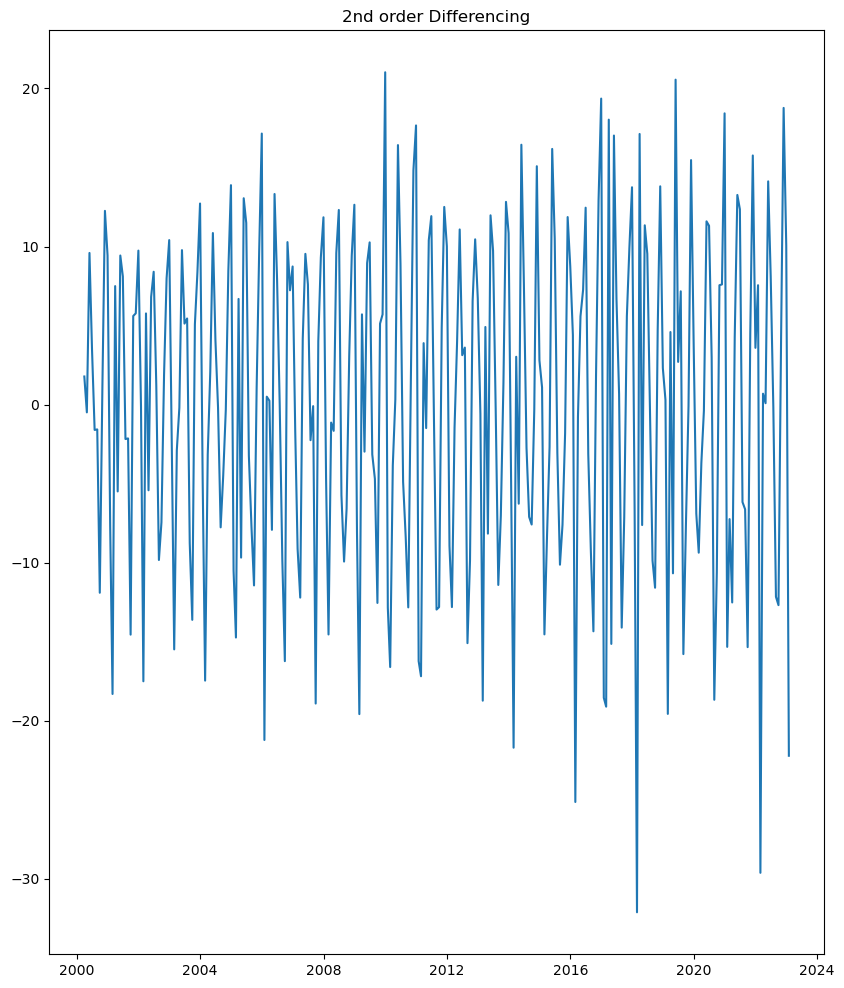

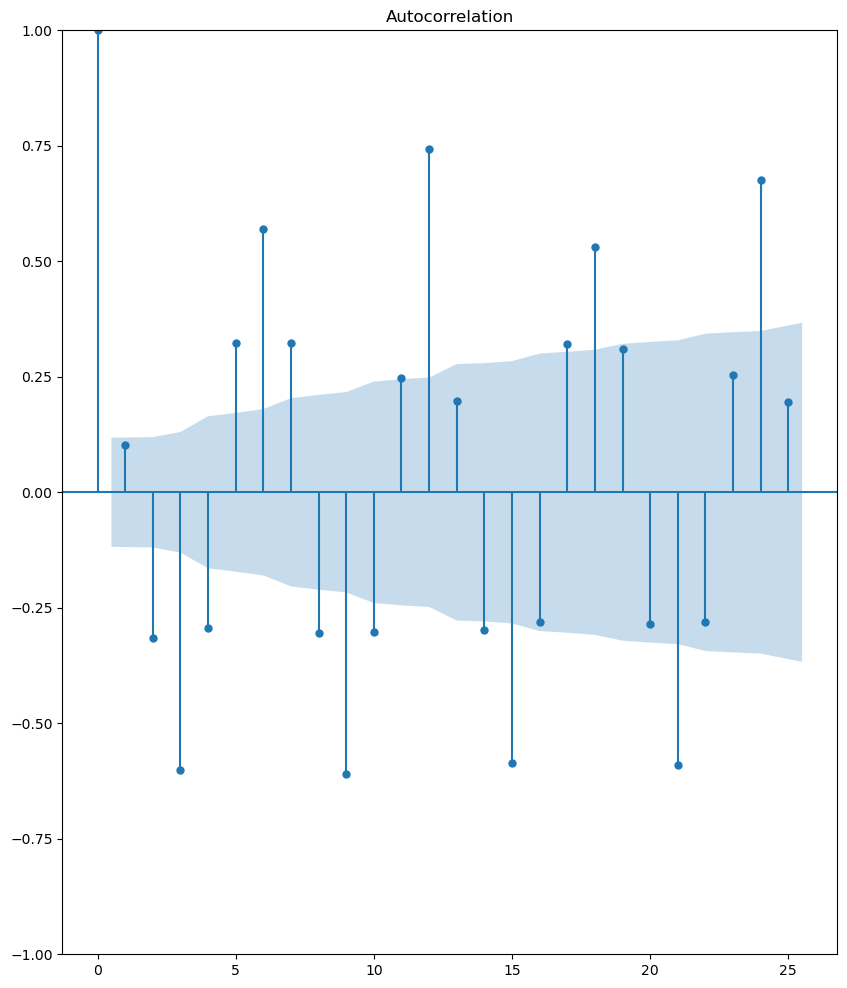

In [ ]:
plt.plot(ts.diff().diff());
plt.title("2nd order Differencing")
acf1=plot_acf(ts.diff().diff().dropna())

For instance, the widely used ARIMA (Auto-Regressive Integrated Moving Average) model for forecasting makes the assumption that the data is stationary. The model will not be able to faithfully reflect the underlying patterns in the data if it is non-stationary, and the findings will be erroneous.
As an illustration, a non-stationary time series could give the impression that there is a high connection between two variables, but in reality, the correlation is only there because of a trend or a seasonal element in the data.

## 3. The management of an organisation would like to know the worldwide online visitors browsing the pages and search engines of their website. The log entries of the users are stored in a .csv file 'Log_Reg_dataset.csv'. The dataset has various features like Country, Age, Repeat_Visitor, Search Engine, Web pages Viewed, and Status. Perform descriptive statistics of each feature using PySpark. Assign probability value 0 and 1 for class 0 and class 1 respectively. Import the required machine learning packages in PySpark and fit a logistic regression model to predict the Status of the test dataset. Compute the confusion matrix and report your observation on the classification metrics.

In [ ]:
import pyspark
from pyspark.sql import SparkSession

In [ ]:
spark =SparkSession.builder.appName('log_reg').getOrCreate()

In [ ]:
df= spark.read.csv('',inferSchema=True,header=True)

In [ ]:
df.show()

+---------+---+--------------+--------+----------------+------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+---------+---+--------------+--------+----------------+------+
|    India| 41|             1|   Yahoo|              21|     1|
|   Brazil| 28|             1|   Yahoo|               5|     0|
|   Brazil| 40|             0|  Google|               3|     0|
|Indonesia| 31|             1|    Bing|              15|     1|
| Malaysia| 32|             0|  Google|              15|     1|
|   Brazil| 32|             0|  Google|               3|     0|
|   Brazil| 32|             0|  Google|               6|     0|
|Indonesia| 27|             0|  Google|               9|     0|
|Indonesia| 32|             0|   Yahoo|               2|     0|
|Indonesia| 31|             1|    Bing|              16|     1|
| Malaysia| 27|             1|  Google|              21|     1|
|Indonesia| 29|             1|   Yahoo|               9|     1|
|Indonesia| 33|             1|   Yahoo| 

In [ ]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)



In [ ]:
df.count()

20000

In [ ]:
df.columns


['Country', 'Age', 'Repeat_Visitor', 'Platform', 'Web_pages_viewed', 'Status']

In [ ]:
len(df.columns)

6

## Descriptive Statistics


In [ ]:
df.groupBy('Country').mean().show()

+---------+------------------+-------------------+---------------------+--------------------+
|  Country|          avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|         avg(Status)|
+---------+------------------+-------------------+---------------------+--------------------+
| Malaysia|27.792282430213465| 0.5730706075533661|   11.192118226600986|  0.6568144499178982|
|    India|27.976854156296664| 0.5433051269288203|   10.727227476356397|  0.6212045793927327|
|Indonesia| 28.43159796354081| 0.5207751683363442|    9.985711939563148|  0.5422893742814913|
|   Brazil|30.274168600154677|  0.322892498066512|    4.921113689095128|0.038669760247486466|
+---------+------------------+-------------------+---------------------+--------------------+



In [ ]:
df.groupBy('Platform').mean().show()

+--------+------------------+-------------------+---------------------+------------------+
|Platform|          avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|       avg(Status)|
+--------+------------------+-------------------+---------------------+------------------+
|   Yahoo|28.569226087838523| 0.5094837204584644|    9.599655137437875|0.5071508266558474|
|    Bing| 28.68394495412844| 0.4720183486238532|    9.114908256880733|0.4559633027522936|
|  Google|28.380038055699707| 0.5149628092025601|    9.804878048780488|0.5210171250648676|
+--------+------------------+-------------------+---------------------+------------------+



In [ ]:
df.groupBy('Status').mean().show()

+------+--------+-------------------+---------------------+-----------+
|Status|avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|avg(Status)|
+------+--------+-------------------+---------------------+-----------+
|     1| 26.5435|             0.7019|              14.5617|        1.0|
|     0| 30.5356|             0.3039|               4.5449|        0.0|
+------+--------+-------------------+---------------------+-----------+



In [ ]:
#preparind the data for ML
#indexing platform column
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol='Platform',outputCol='Platform_Num')
indexed=indexer.fit(df).transform(df)
indexed.head(5)

[Row(Country='India', Age=41, Repeat_Visitor=1, Platform='Yahoo', Web_pages_viewed=21, Status=1, Platform_Num=0.0),
 Row(Country='Brazil', Age=28, Repeat_Visitor=1, Platform='Yahoo', Web_pages_viewed=5, Status=0, Platform_Num=0.0),
 Row(Country='Brazil', Age=40, Repeat_Visitor=0, Platform='Google', Web_pages_viewed=3, Status=0, Platform_Num=1.0),
 Row(Country='Indonesia', Age=31, Repeat_Visitor=1, Platform='Bing', Web_pages_viewed=15, Status=1, Platform_Num=2.0),
 Row(Country='Malaysia', Age=32, Repeat_Visitor=0, Platform='Google', Web_pages_viewed=15, Status=1, Platform_Num=1.0)]

In [ ]:
df.show(3,False)

+-------+---+--------------+--------+----------------+------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+-------+---+--------------+--------+----------------+------+
|India  |41 |1             |Yahoo   |21              |1     |
|Brazil |28 |1             |Yahoo   |5               |0     |
|Brazil |40 |0             |Google  |3               |0     |
+-------+---+--------------+--------+----------------+------+
only showing top 3 rows



In [ ]:
from pyspark.ml.feature import OneHotEncoder
search_engine_encoder= OneHotEncoder(inputCol='Platform_Num',outputCol='PLatform Vector')
search_engine_encoder.setDropLast(False)
fit=search_engine_encoder.fit(indexed)
df=fit.transform(indexed)

In [ ]:
df.groupBy('PLatform').count().orderBy('count',ascending=False).show(5,False)

+--------+-----+
|PLatform|count|
+--------+-----+
|Yahoo   |9859 |
|Google  |5781 |
|Bing    |4360 |
+--------+-----+



In [ ]:
df.groupBy('Platform_Num').count().orderBy('count',ascending=False).show(5,False)

+------------+-----+
|Platform_Num|count|
+------------+-----+
|0.0         |9859 |
|1.0         |5781 |
|2.0         |4360 |
+------------+-----+



In [ ]:
df.groupBy('PLatform Vector').count().orderBy('count',ascending=False).show(5,False)

+---------------+-----+
|PLatform Vector|count|
+---------------+-----+
|(3,[0],[1.0])  |9859 |
|(3,[1],[1.0])  |5781 |
|(3,[2],[1.0])  |4360 |
+---------------+-----+



In [ ]:
df.select(['PLatform','PLatform_Num','PLatform Vector']).show(3,False)

+--------+------------+---------------+
|PLatform|PLatform_Num|PLatform Vector|
+--------+------------+---------------+
|Yahoo   |0.0         |(3,[0],[1.0])  |
|Yahoo   |0.0         |(3,[0],[1.0])  |
|Google  |1.0         |(3,[1],[1.0])  |
+--------+------------+---------------+
only showing top 3 rows



In [ ]:
# indexing for country column
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol='Country',outputCol='Country_Num')
indexed=indexer.fit(df).transform(df)
indexed.head(5)

[Row(Country='India', Age=41, Repeat_Visitor=1, Platform='Yahoo', Web_pages_viewed=21, Status=1, Platform_Num=0.0, PLatform Vector=SparseVector(3, {0: 1.0}), Country_Num=1.0),
 Row(Country='Brazil', Age=28, Repeat_Visitor=1, Platform='Yahoo', Web_pages_viewed=5, Status=0, Platform_Num=0.0, PLatform Vector=SparseVector(3, {0: 1.0}), Country_Num=2.0),
 Row(Country='Brazil', Age=40, Repeat_Visitor=0, Platform='Google', Web_pages_viewed=3, Status=0, Platform_Num=1.0, PLatform Vector=SparseVector(3, {1: 1.0}), Country_Num=2.0),
 Row(Country='Indonesia', Age=31, Repeat_Visitor=1, Platform='Bing', Web_pages_viewed=15, Status=1, Platform_Num=2.0, PLatform Vector=SparseVector(3, {2: 1.0}), Country_Num=0.0),
 Row(Country='Malaysia', Age=32, Repeat_Visitor=0, Platform='Google', Web_pages_viewed=15, Status=1, Platform_Num=1.0, PLatform Vector=SparseVector(3, {1: 1.0}), Country_Num=3.0)]

In [ ]:
from pyspark.ml.feature import OneHotEncoder
search_engine_encoder= OneHotEncoder(inputCol='Country_Num',outputCol='Country Vector')
search_engine_encoder.setDropLast(False)
fit=search_engine_encoder.fit(indexed)
df=fit.transform(indexed)

In [ ]:
df.groupBy('Country').count().orderBy('count',ascending=False).show(5,False)

+---------+-----+
|Country  |count|
+---------+-----+
|Indonesia|12178|
|India    |4018 |
|Brazil   |2586 |
|Malaysia |1218 |
+---------+-----+



In [ ]:
df.groupBy('Country_Num').count().orderBy('count',ascending=False).show(5,False)

+-----------+-----+
|Country_Num|count|
+-----------+-----+
|0.0        |12178|
|1.0        |4018 |
|2.0        |2586 |
|3.0        |1218 |
+-----------+-----+



In [ ]:
df.groupBy('Country Vector').count().orderBy('count',ascending=False).show(5,False)

+--------------+-----+
|Country Vector|count|
+--------------+-----+
|(4,[0],[1.0]) |12178|
|(4,[1],[1.0]) |4018 |
|(4,[2],[1.0]) |2586 |
|(4,[3],[1.0]) |1218 |
+--------------+-----+



In [ ]:
df.select(['Country','Country_Num','Country Vector']).show(3,False)

+-------+-----------+--------------+
|Country|Country_Num|Country Vector|
+-------+-----------+--------------+
|India  |1.0        |(4,[1],[1.0]) |
|Brazil |2.0        |(4,[2],[1.0]) |
|Brazil |2.0        |(4,[2],[1.0]) |
+-------+-----------+--------------+
only showing top 3 rows



In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
df.columns

['Country',
 'Age',
 'Repeat_Visitor',
 'Platform',
 'Web_pages_viewed',
 'Status',
 'Platform_Num',
 'PLatform Vector',
 'Country_Num',
 'Country Vector']

In [ ]:
df_assembler= VectorAssembler(
    inputCols=['Age',
 'Repeat_Visitor',
 'Web_pages_viewed',
 'PLatform Vector',
 'Country Vector'],
    outputCol="features")
df= df_assembler.transform(df)

In [ ]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Platform_Num: double (nullable = false)
 |-- PLatform Vector: vector (nullable = true)
 |-- Country_Num: double (nullable = false)
 |-- Country Vector: vector (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
df.select(["features","Status"]).show(10,False)

+----------------------------------------+------+
|features                                |Status|
+----------------------------------------+------+
|(10,[0,1,2,3,7],[41.0,1.0,21.0,1.0,1.0])|1     |
|(10,[0,1,2,3,8],[28.0,1.0,5.0,1.0,1.0]) |0     |
|(10,[0,2,4,8],[40.0,3.0,1.0,1.0])       |0     |
|(10,[0,1,2,5,6],[31.0,1.0,15.0,1.0,1.0])|1     |
|(10,[0,2,4,9],[32.0,15.0,1.0,1.0])      |1     |
|(10,[0,2,4,8],[32.0,3.0,1.0,1.0])       |0     |
|(10,[0,2,4,8],[32.0,6.0,1.0,1.0])       |0     |
|(10,[0,2,4,6],[27.0,9.0,1.0,1.0])       |0     |
|(10,[0,2,3,6],[32.0,2.0,1.0,1.0])       |0     |
|(10,[0,1,2,5,6],[31.0,1.0,16.0,1.0,1.0])|1     |
+----------------------------------------+------+
only showing top 10 rows



In [ ]:
final_data=df.select('features','Status')

In [ ]:
train_df,test_df=final_data.randomSplit([0.75,0.25])
#75% for traning and 25% for testing

In [ ]:
#importing the required libary for Logistic Regression
from pyspark.ml.classification import LogisticRegression

In [ ]:
train_df.count()

15029

In [ ]:
train_df.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 7498|
|     0| 7531|
+------+-----+



In [ ]:
log_reg=LogisticRegression(labelCol="Status").fit(train_df)

In [ ]:
train_results=log_reg.evaluate(train_df).predictions

In [ ]:
train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).select(['Status','prediction','probability']).show(10,False)

+------+----------+----------------------------------------+
|Status|prediction|probability                             |
+------+----------+----------------------------------------+
|1     |1.0       |[0.4330789619210079,0.5669210380789921] |
|1     |1.0       |[0.4330789619210079,0.5669210380789921] |
|1     |1.0       |[0.2645274060174612,0.7354725939825388] |
|1     |1.0       |[0.2645274060174612,0.7354725939825388] |
|1     |1.0       |[0.2645274060174612,0.7354725939825388] |
|1     |1.0       |[0.144817957348445,0.8551820426515551]  |
|1     |1.0       |[0.144817957348445,0.8551820426515551]  |
|1     |1.0       |[0.07384280967560361,0.9261571903243964]|
|1     |1.0       |[0.07384280967560361,0.9261571903243964]|
|1     |1.0       |[0.07384280967560361,0.9261571903243964]|
+------+----------+----------------------------------------+
only showing top 10 rows



In [ ]:
correct_preds=train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).count()
correct_preds

7027

In [ ]:
#Accuracy on traing dataset
float(correct_preds)/(training_df.filter(training_df['Status']==1)).count()

0.9484410851666891

In [ ]:
#test sample
results=log_reg.evaluate(test_df).predictions

In [ ]:
results.select(['Status','prediction']).show(5,False)

+------+----------+
|Status|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|1     |0.0       |
+------+----------+
only showing top 5 rows



In [ ]:
results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Status: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
results[(results['Status']==1) & (results.prediction == 1)].count()

2343

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
#confusion matrix
true_positives=results[(results['Status']==1) & (results.prediction == 1)].count()
true_negatives=results[(results['Status']==0) & (results.prediction == 0)].count()
false_positives=results[(results['Status']==0) & (results.prediction == 1)].count()
false_negatives=results[(results['Status']==1) & (results.prediction == 0)].count()

In [ ]:
print("True positives:",true_positives)
print("True negatives:",true_negatives)
print("False positives:",false_positives)
print("False negatives:",true_positives)

True positives: 2343
True negatives: 2329
False positives: 140
False negatives: 2343


In [ ]:
print(true_positives+true_negatives+false_positives+false_negatives)

4971


In [ ]:
print(results.count())

4971


In [ ]:
recall=float(true_positives)/(true_positives+false_negatives)
print(recall)

0.9364508393285371


In [ ]:
percision=float(true_positives)/(true_positives+false_positives)
print(percision)

0.9436165928312525


In [ ]:
accuracy=float(true_positives+true_negatives)/(results.count())
print(accuracy)

0.939851136592235


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

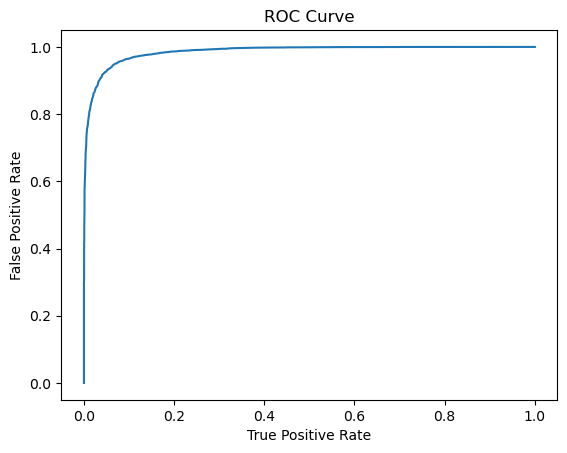

In [ ]:
#recevier Operating Chacteristics
trainsummary=log_reg.summary#summary of model results
roc=trainsummary.roc.toPandas()#transform to Pandas formats
plt.plot(roc['FPR'],roc['TPR'])#plot the False Positive Rate,True Positive Rate
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
print('Training set are Under the Curve (AUC):'+str(trainsummary.areaUnderROC))

Training set are Under the Curve (AUC):0.9857590758766139


## 4. Given the dataset “Superstore.xlsx”, forecast the sales of the category “Office Supplies” by performing the tasks given below.
* a. Explore the dataset to report Stationarity using Rolling plots and Statistical Tests.
* b. Determine the order of differencing, d.
* c. Determine the order p for autoregressive process ΑR(p).
* d. Determine the order q for moving averages MA(q).
* e. Fit ARIMA (p, d, q) using Q.4.b, 4.c, and 4.d and report the results with accuracy metrics.

In [ ]:
import pandas as pd
location=('')
data=pd.read_excel(location)

In [ ]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
data.shape

(9994, 21)

In [ ]:
data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
Office_Supplies=data.loc[data['Category']=='Office Supplies']

In [ ]:
Office_Supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [ ]:
Office_Supplies['Order Date'].min(),Office_Supplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
Office_Supplies.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols=['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [ ]:
Office_Supplies.drop(cols,axis=1,inplace=True)

C:\Users\gokul\AppData\Local\Temp\ipykernel_15020\1129588975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Office_Supplies.drop(cols,axis=1,inplace=True)


In [ ]:
Office_Supplies.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
Office_Supplies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6026 entries, 2 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  6026 non-null   datetime64[ns]
 1   Sales       6026 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 141.2 KB


In [ ]:
temp=Office_Supplies.groupby('Order Date')['Sales'].size()
temp

Order Date
2014-01-03     1
2014-01-04     3
2014-01-05     1
2014-01-06     6
2014-01-07     1
              ..
2017-12-26     4
2017-12-27     1
2017-12-28    12
2017-12-29     5
2017-12-30     5
Name: Sales, Length: 1148, dtype: int64

In [ ]:
temp[temp > 1].sort_values(ascending=False)

Order Date
2017-12-09    25
2016-11-10    25
2016-09-05    24
2017-12-02    22
2017-09-02    22
              ..
2017-06-27     2
2015-08-15     2
2017-07-02     2
2016-10-22     2
2017-03-07     2
Name: Sales, Length: 987, dtype: int64

In [ ]:
Office_Supplies=Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()
Office_Supplies

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


# Indexing with Timeseries

In [ ]:
Office_Supplies=Office_Supplies.set_index('Order Date')
Office_Supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [ ]:
Office_Supplies.sample(10)

,Sales
Order Date,
2017-08-31,1243.954
2017-06-06,26.400
2016-09-08,966.290
2015-04-09,388.080
2015-11-17,1802.990
2017-11-22,35.712
2017-04-06,114.420
2015-08-22,66.632
2015-05-18,10.860


In [ ]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

<Figure size 1600x800 with 0 Axes>

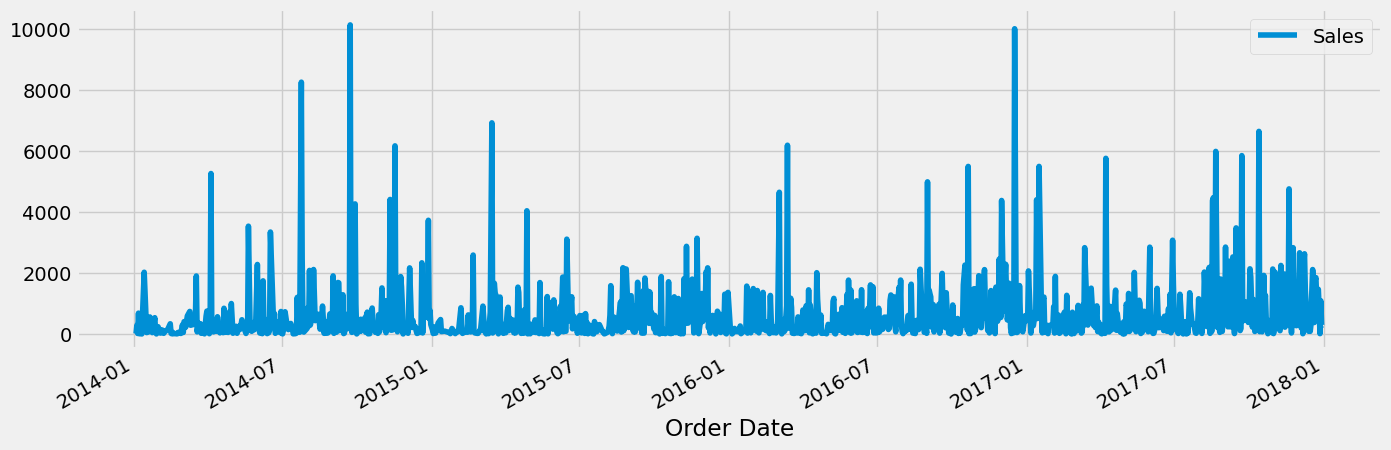

In [ ]:
plt.figure(figsize=(16,8));
Office_Supplies.plot();

In [ ]:
pd.DatetimeIndex(Office_Supplies.index).year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Order Date', length=1148)

In [ ]:
pd.DatetimeIndex(Office_Supplies.index).month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Order Date', length=1148)

In [ ]:
pd.DatetimeIndex(Office_Supplies.index).day

Int64Index([ 3,  4,  5,  6,  7,  9, 10, 13, 16, 18,
            ...
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64', name='Order Date', length=1148)

In [ ]:
Office_Supplies['year']=pd.DatetimeIndex(Office_Supplies.index).year
Office_Supplies['month']=pd.DatetimeIndex(Office_Supplies.index).month
Office_Supplies['day name']=pd.DatetimeIndex(Office_Supplies.index).day_name()
Office_Supplies

,Sales,year,month,day name
Order Date,,,,
2014-01-03,16.448,2014,1,Friday
2014-01-04,288.060,2014,1,Saturday
2014-01-05,19.536,2014,1,Sunday
2014-01-06,685.340,2014,1,Monday
2014-01-07,10.430,2014,1,Tuesday
...,...,...,...,...
2017-12-26,814.594,2017,12,Tuesday
2017-12-27,13.248,2017,12,Wednesday
2017-12-28,1091.244,2017,12,Thursday


<AxesSubplot:xlabel='Order Date'>

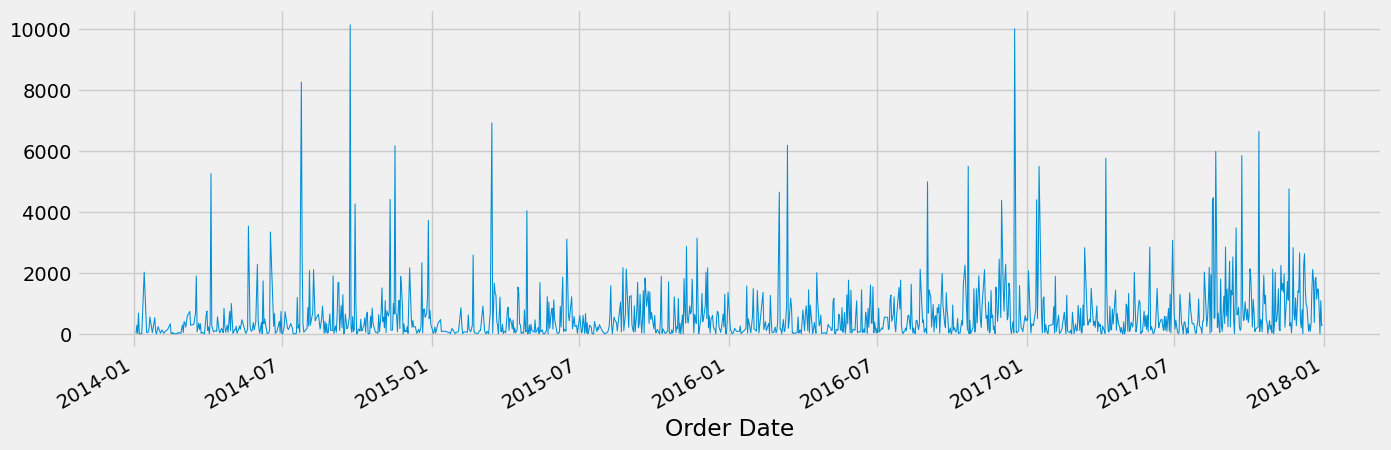

In [ ]:
#create a line plot of the full time series of the daily sales,
#using the Dataframe's plot() method
Office_Supplies['Sales'].plot(linewidth=0.75)

Text(0, 0.5, 'Daily Consolidated Sales')

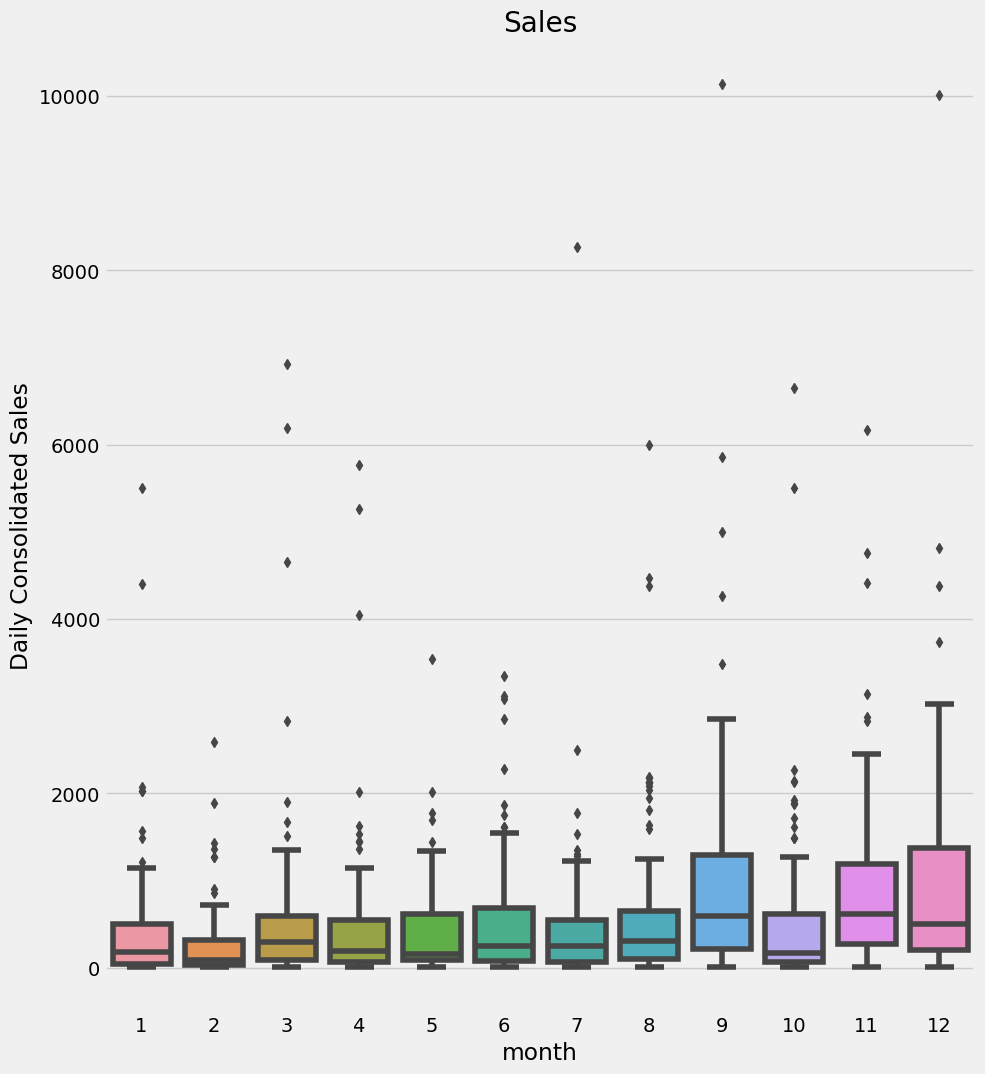

In [ ]:
fig, ax= plt.subplots(figsize=(10,12))
sns.boxplot(data=Office_Supplies,x='month',y='Sales',ax=ax)
ax.set_title('Sales')
ax.set_ylabel('Daily Consolidated Sales')

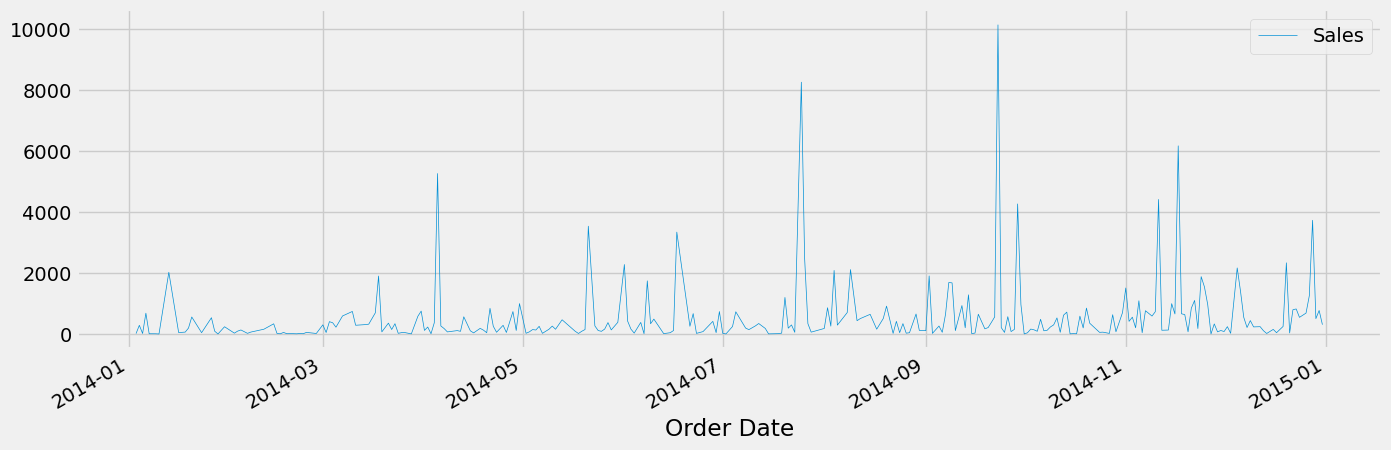

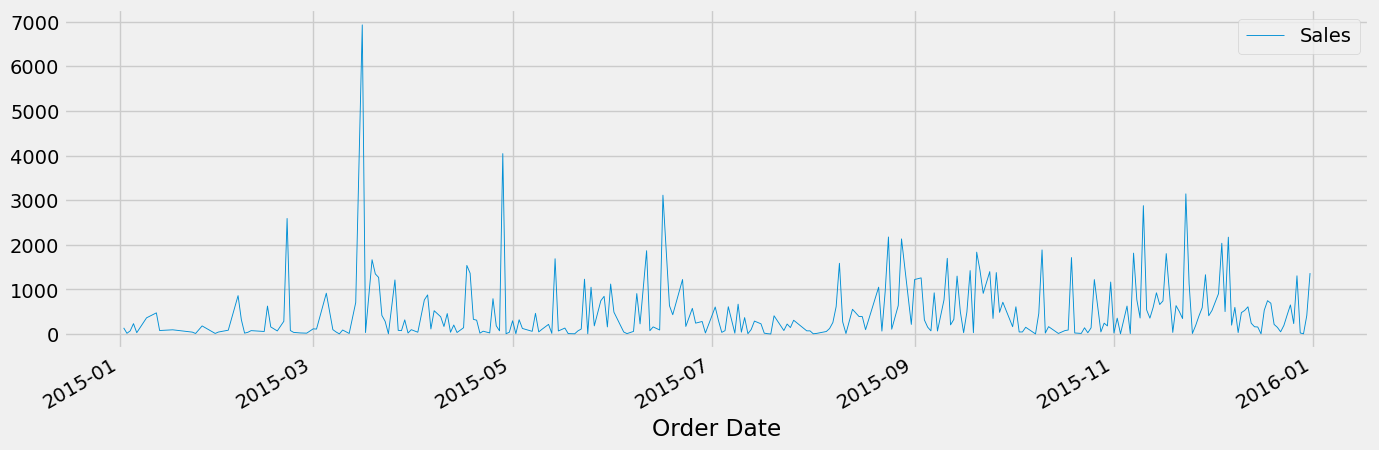

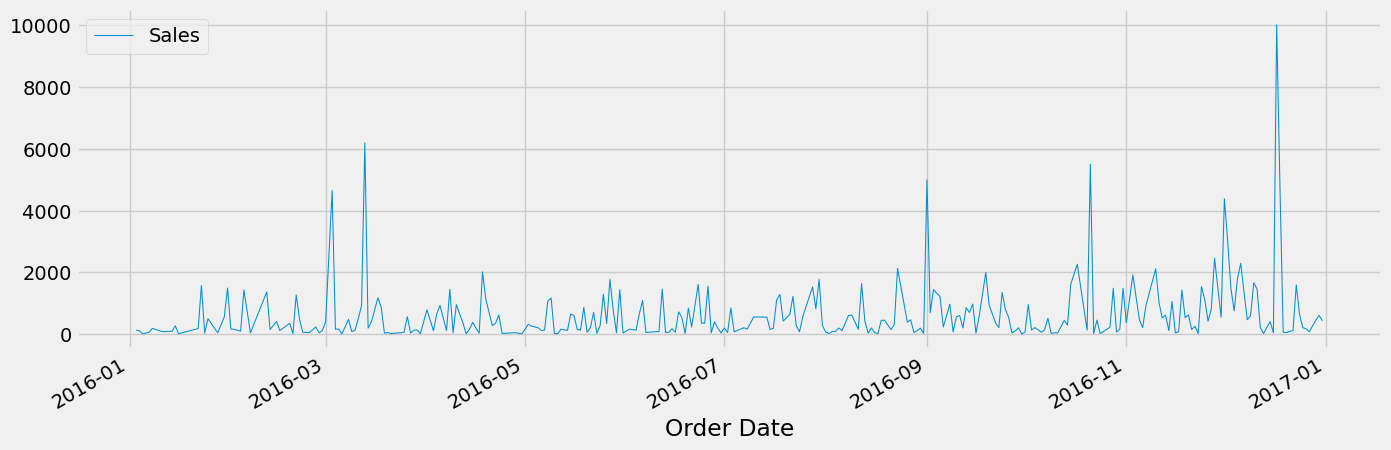

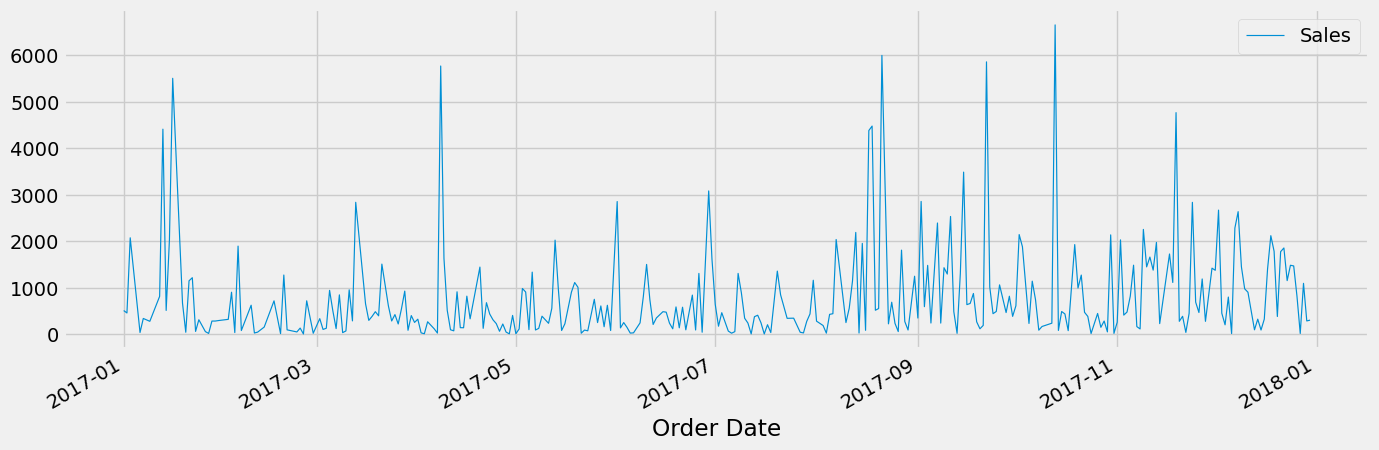

In [ ]:
cols_plot=['Sales']
Office_Supplies.loc['2014'][cols_plot].plot(linewidth=0.5);
Office_Supplies.loc['2015'][cols_plot].plot(linewidth=0.65);
Office_Supplies.loc['2016'][cols_plot].plot(linewidth=0.75);
Office_Supplies.loc['2017'][cols_plot].plot(linewidth=0.85);

In [ ]:
#monthly sales
data_columns=['Sales']

# Resample to monthly Frequency,aggregating with mean
Office_Supplies_monthly= Office_Supplies[data_columns].resample('M').sum()
Office_Supplies_monthly

,Sales
Order Date,
2014-01-31,4851.080
2014-02-28,1071.724
2014-03-31,8605.879
2014-04-30,11155.074
2014-05-31,7135.624
2014-06-30,12953.037
2014-07-31,15121.208
2014-08-31,11379.462
2014-09-30,27423.298


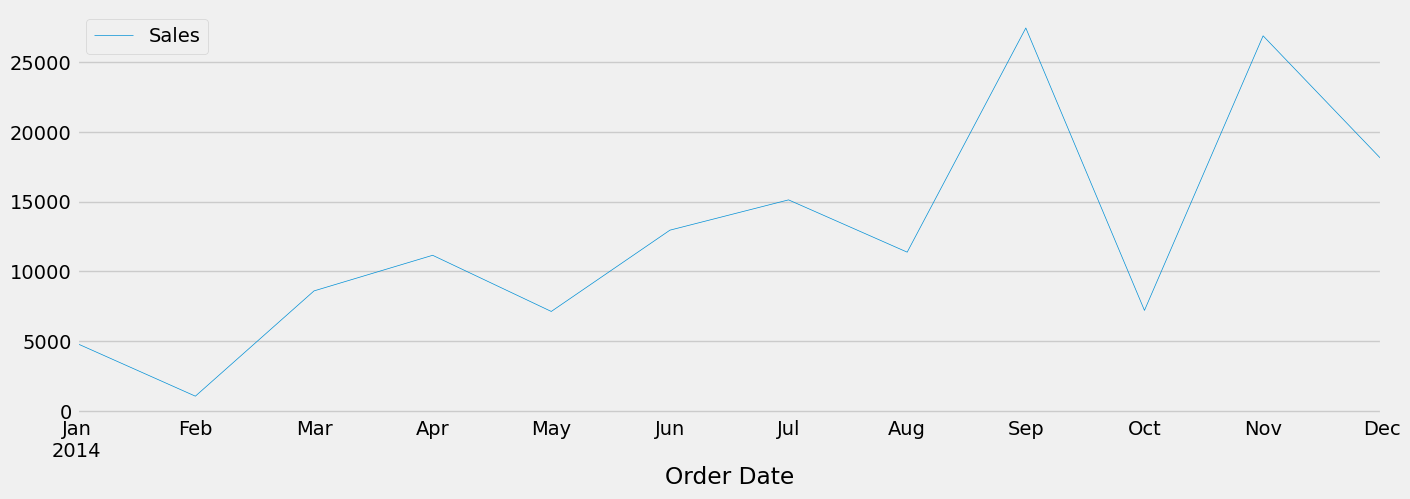

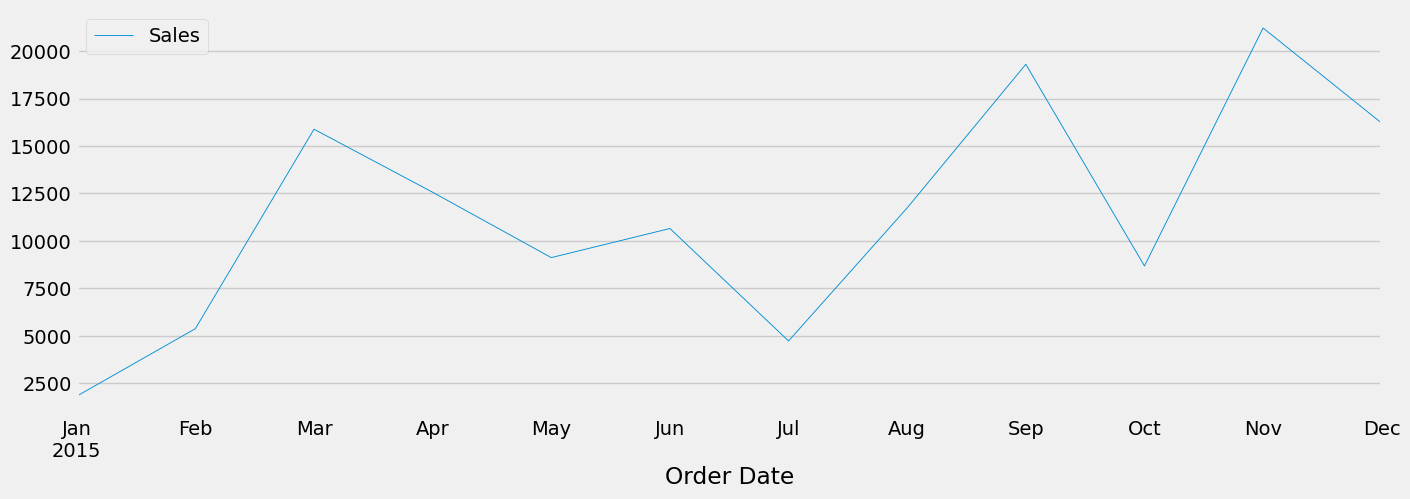

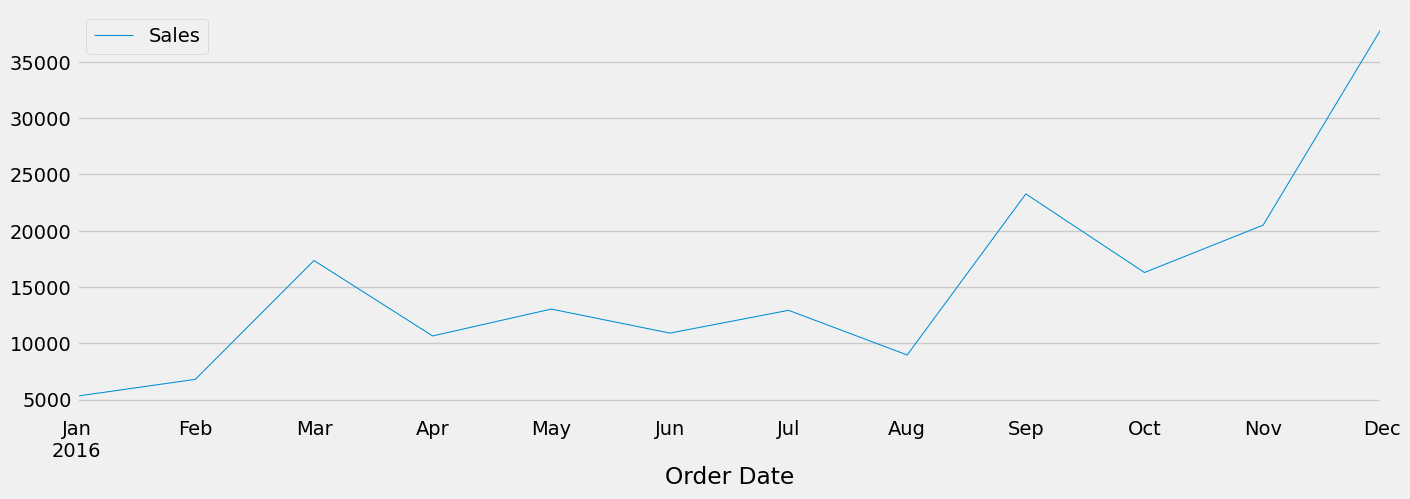

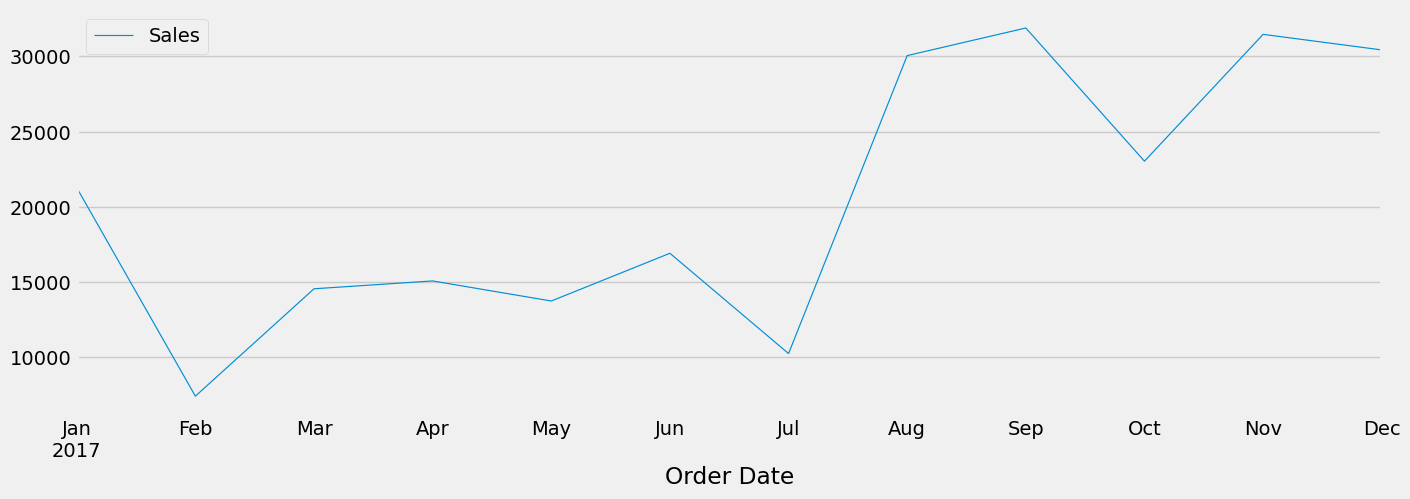

In [ ]:
Office_Supplies_monthly.loc['2014'][cols_plot].plot(linewidth=0.5);
Office_Supplies_monthly.loc['2015'][cols_plot].plot(linewidth=0.65);
Office_Supplies_monthly.loc['2016'][cols_plot].plot(linewidth=0.75);
Office_Supplies_monthly.loc['2017'][cols_plot].plot(linewidth=0.85);

## Observation
* we can see a pattern of sales getting higher in the month of September and getting drop on Octber
  and again raising in the month of November
* Every year , there is sligth uptrend visible
* sales up in the months of mar sep Nov    

## a. Explore the dataset to report Stationarity using Rolling plots and Statistical Tests.

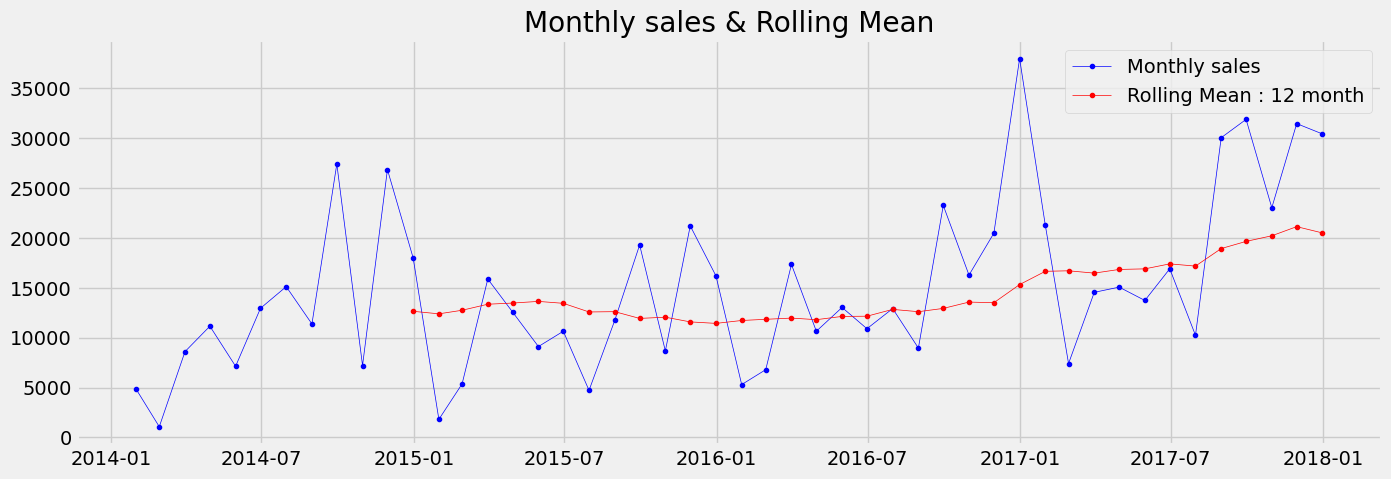

In [ ]:
ts=Office_Supplies_monthly['Sales']




moving_avg=ts.rolling(window=12).mean()




#Plotting the time series
plt.plot(ts, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

In [ ]:
for year in np.unique(Office_Supplies.year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = Office_Supplies.loc[str(year)]['Sales'].values

    result = adfuller(X)

    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = Office_Supplies['Sales'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))


For the year :  2014
ADF Statistic: -15.544645
p-value: 0.000000
Critical Values:
	   1%:   -3.455
	   5%:   -2.872
	  10%:   -2.572

For the year :  2015
ADF Statistic: -16.356377
p-value: 0.000000
Critical Values:
	   1%:   -3.455
	   5%:   -2.872
	  10%:   -2.572

For the year :  2016
ADF Statistic: -14.498885
p-value: 0.000000
Critical Values:
	   1%:   -3.453
	   5%:   -2.872
	  10%:   -2.572

For the year :  2017
ADF Statistic: -16.541488
p-value: 0.000000
Critical Values:
	   1%:   -3.452
	   5%:   -2.871
	  10%:   -2.572

For the CONSOLIDATED 4 years
ADF Statistic: -30.973357
p-value: 0.000000
Critical Values:
	   1%:   -3.436
	   5%:   -2.864
	  10%:   -2.568


# conclusion
* Consolidated years - p Values is less than 0.05 or 0.01 hence Ho can be rejected
* Ho denotes Not Stationary'
* Means TS is stationery
* Yearly p-value method ; p-value is less than 0.05 so we reject the null hypothesis for yearly Time Series

## b. Determine the order of differencing, d.

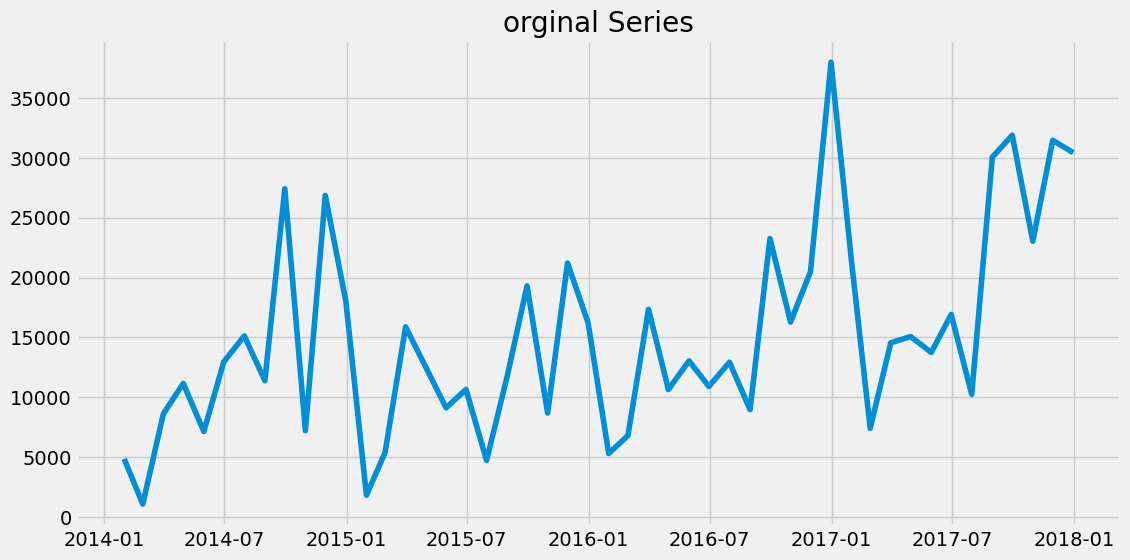

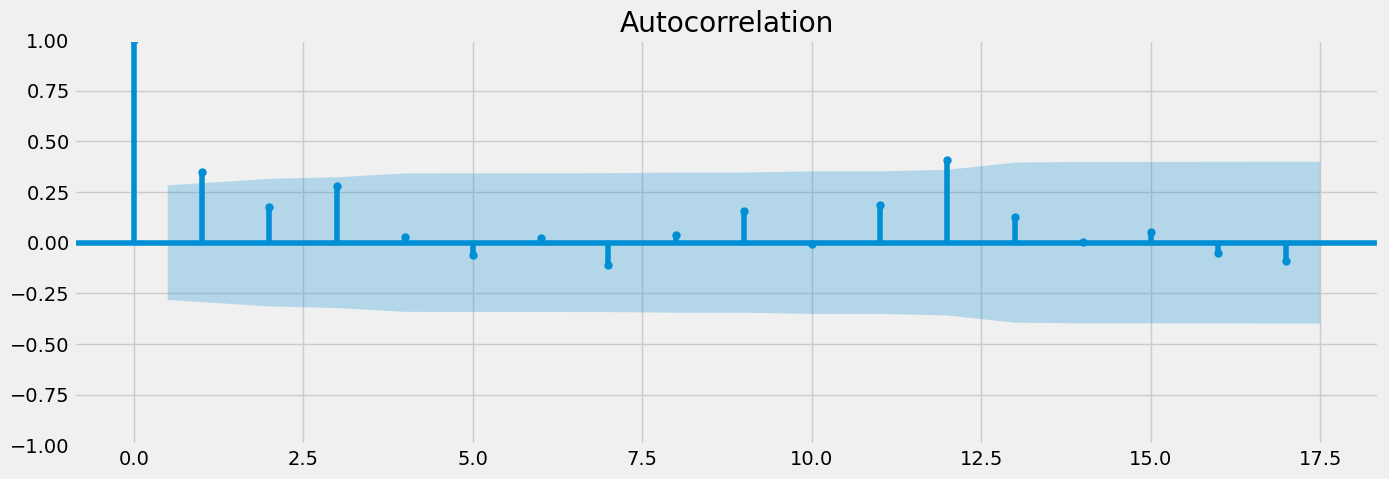

In [ ]:
#orginal Series
plt.figure(figsize=(12,6))

plt.plot(ts)
plt.title("orginal Series")
acf0=plot_acf(ts)

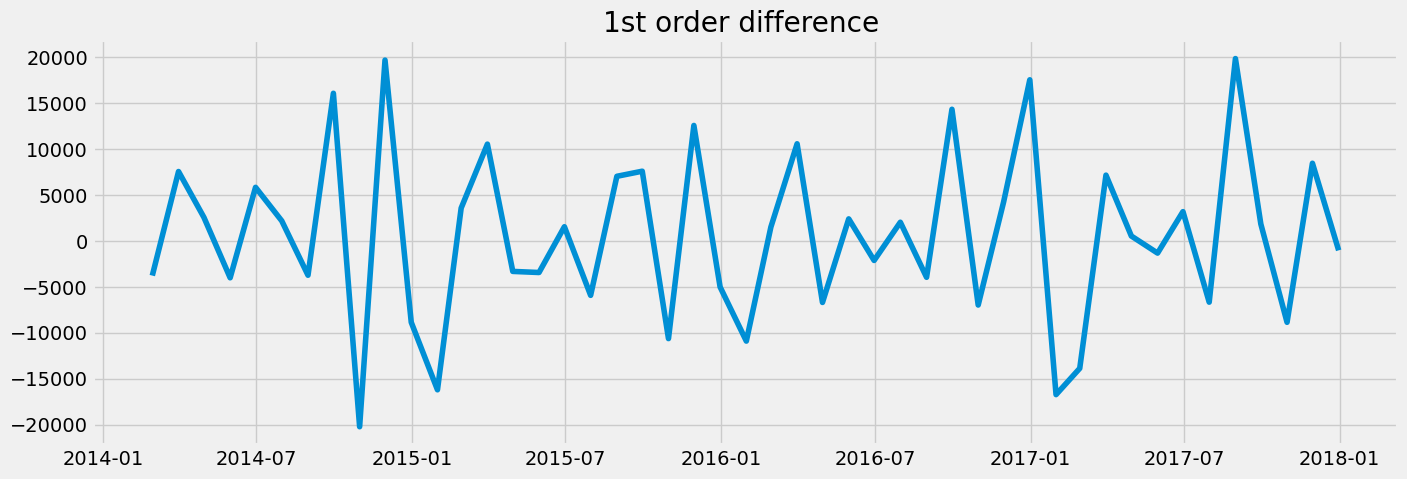

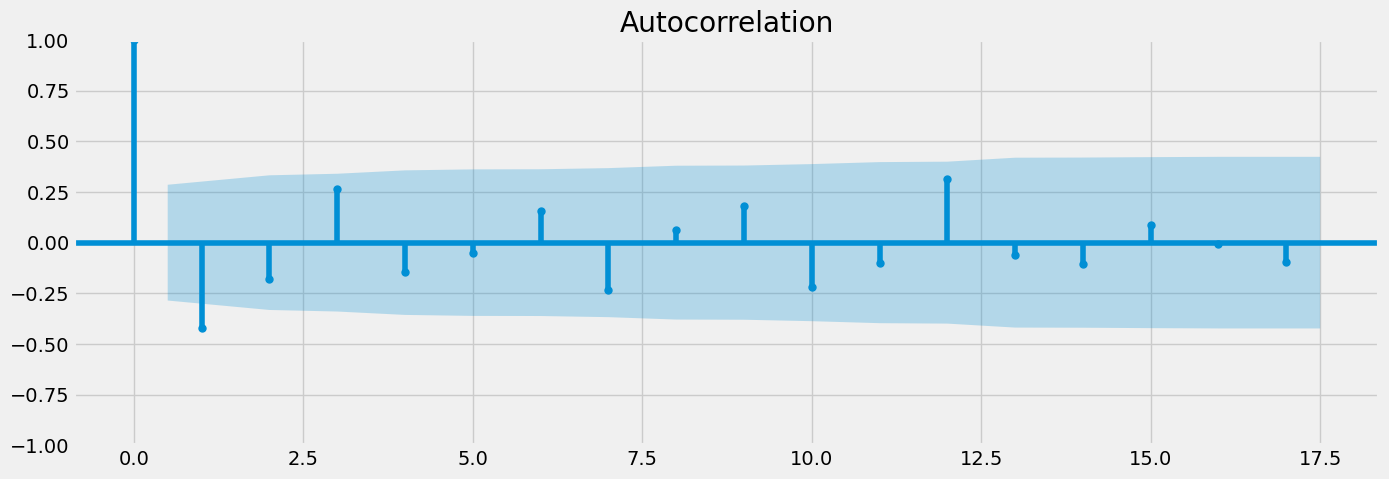

In [ ]:
plt.plot(ts.diff())
plt.title("1st order difference ")
acf1=plot_acf(ts.diff().dropna())

In [ ]:
#observation

## c. Determine the order p for autoregressive process ΑR(p).

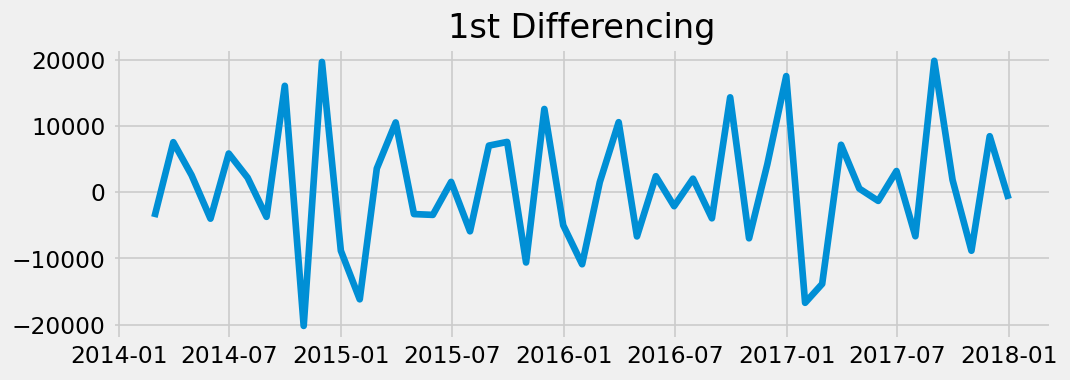

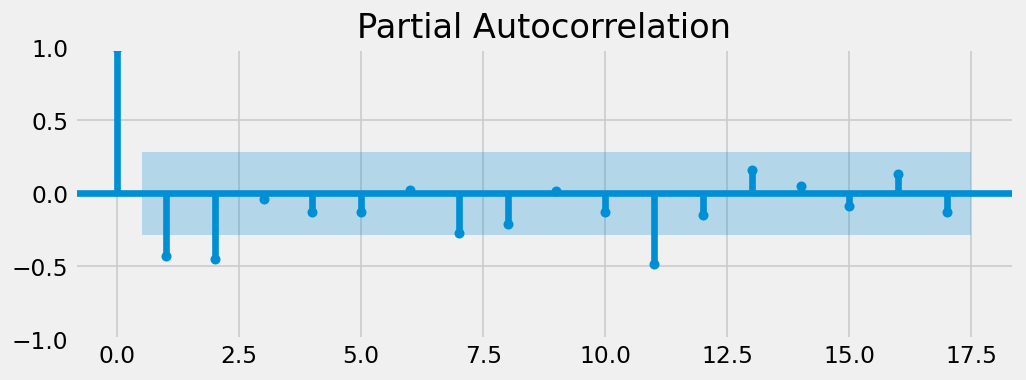

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
plt.plot(ts.diff());
plt.title('1st Differencing')
pacf = plot_pacf(ts.diff().dropna())

In the above partial autocorrelation plot ,we dont observe any significant spikes in lower order lags( however a slight portion of first lag is into negative zone)
Therefore,we can be conservative and tentatively fix the p as 0 we can try with 1 later

## d. Determine the order q for moving averages MA(q).

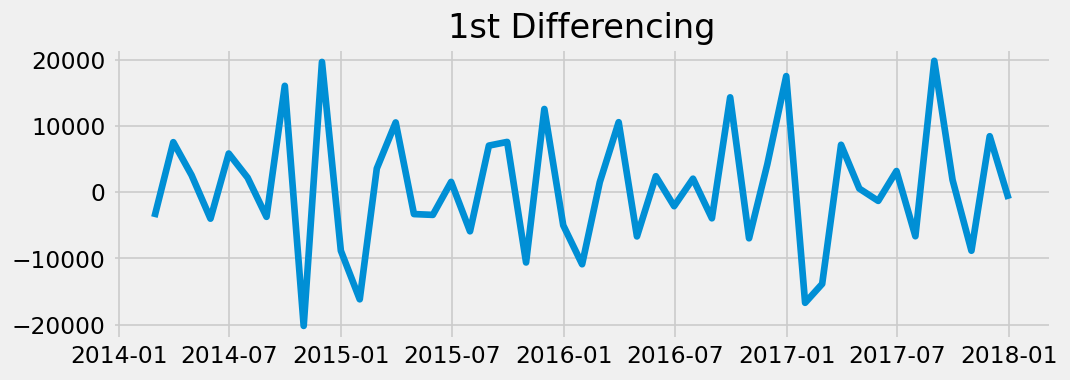

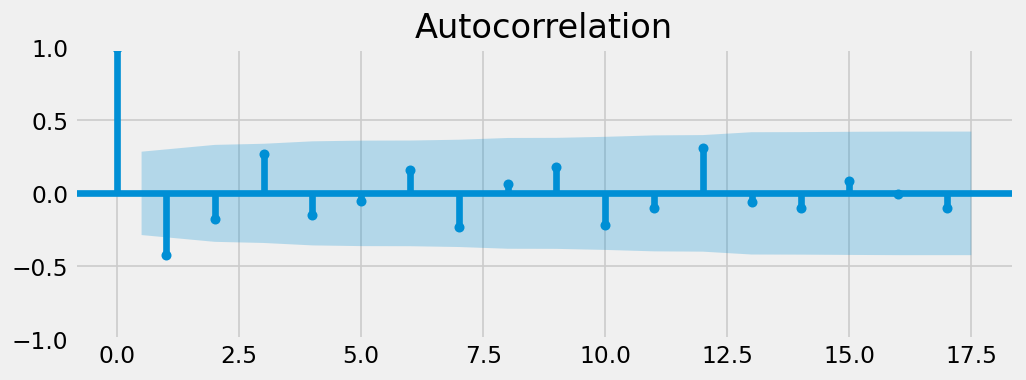

In [ ]:
plt.plot(ts.diff())
plt.title("1st Differencing")
acf=plot_acf(ts.diff().dropna())

In [ ]:
mod_default = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 0, 0),
                                seasonal_order=(1, 0 , 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default = mod_default.fit()

In [ ]:
print(results_default.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       3.9195         -0       -inf      0.000       3.920       3.920
ma.S.L12    1.666e+14         -0       -inf      0.000    1.67e+14    1.67e+14
sigma2      1.471e-12   3.21e-10      0.005      0.996   -6.27e-10     6.3e-10


* The summary attribute that results from the output of SARIMAX returns a Significant amount of information,but We"ll focus our attention on the table of coefficients

* The coef column shows the weight (i.e importance) of each feature and how each one impacts the time series. the p>|z| column informs us the significance of each feature weight. Here, each weight has a p-value lower to 0.05, so it is reasonable to reatin all of them in our model